# PART ONE - BASIC ANALYSIS 

In [2]:
#Import necessary librarys for this section
#Open first data set - 5 core reviews for electronics - by converting JSON file to pandas dataframe format 

import pandas as pd
import gzip
from datetime import datetime

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Electronics_5.json.gz')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [3]:
#Look at the length of the total dataset 
print(len(df))

1689188


In [4]:
#describe the dataset 
df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [5]:
#Analyse the format of all data types 
#Most are labelled as objects apart from the rating and Time which are numerical
#Time needs to be changed to an appropriate format 
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [6]:
#changing the Time format to pandas DateTime
df['ReviewTime'] = pd.to_datetime(df['unixReviewTime'],unit='s')

In [7]:
#A new column called ReviewTime was added to the dataframe with correct format
df.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime                object
ReviewTime        datetime64[ns]
dtype: object

In [8]:
#The other two columms with incorrect format for Date/Time were removed from the dataframe 
df.drop(['reviewTime', 'unixReviewTime'], axis="columns", inplace =True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,ReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",2011-09-29


In [9]:
#We want to keep duplicate rows as there are multiple of the same products but with different ratings.
#To make analysis easier we need to change the product name (asin) to the actual product name
#To change product name we need the metadata for the ratings and merge tables together 

#Open up next file which contains the metadata for the electronics category


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

metadata = getDF('meta_Electronics.json.gz')
metadata.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [10]:
#Merge both dataframes together using the column 'asin' as a common key from both 
rating_data = pd.merge(df, metadata, how="left", on="asin")
rating_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,ReviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,2013-06-02,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,2010-11-25,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,2010-09-09,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",2010-11-24,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",2011-09-29,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [11]:
#Visualise if any of the columns contain null values
rating_data.isnull().sum()

reviewerID           0
asin                 0
reviewerName     24730
helpful              0
reviewText           0
overall              0
summary              0
ReviewTime           0
imUrl             1213
description      33677
categories           0
title            45502
price            49306
salesRank       879118
related          27046
brand           734937
dtype: int64

In [12]:
#Drop all rows that contain null values as they create inaccuracy in data reliance 
rating_data = rating_data.dropna()

In [13]:
#Double checking the dataset contains no null values 
rating_data.isnull().sum()

reviewerID      0
asin            0
reviewerName    0
helpful         0
reviewText      0
overall         0
summary         0
ReviewTime      0
imUrl           0
description     0
categories      0
title           0
price           0
salesRank       0
related         0
brand           0
dtype: int64

In [14]:
#Visualising all formats for merge data set
rating_data.dtypes

reviewerID              object
asin                    object
reviewerName            object
helpful                 object
reviewText              object
overall                float64
summary                 object
ReviewTime      datetime64[ns]
imUrl                   object
description             object
categories              object
title                   object
price                  float64
salesRank               object
related                 object
brand                   object
dtype: object

In [15]:
#Some columns are not necessary for the analysis and hence removed to make the data easier to work with 
rating_data.drop(['imUrl', 'reviewerName', 'salesRank'], axis="columns", inplace =True)
rating_data.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand
19,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[[Electronics, Accessories & Supplies, Audio &...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
20,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[[Electronics, Accessories & Supplies, Audio &...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
21,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[[Electronics, Accessories & Supplies, Audio &...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
22,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[[Electronics, Accessories & Supplies, Audio &...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
23,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[[Electronics, Accessories & Supplies, Audio &...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu


In [16]:
#Final length of the data 
print(len(rating_data))

517687


In [ ]:
#Saving dataframe to csv file for part two of the assignment 
rating_data.to_csv(r'directory name here', index=False)

# PART TWO - ADVANCED ANALYSIS 


In [17]:
#Import Necessary Librarys for this section 

import pandas as pd
import numpy as np
from datetime import datetime 
import calendar

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
%matplotlib inline
import json
import csv
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


import warnings
warnings.filterwarnings("ignore")

In [18]:
#Open cleaned dataset from part 1 
reviews = pd.read_csv("3030ICT.data.csv")
reviews.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu


In [19]:
#count total for each rating category 
ratingcounts = reviews['overall'].value_counts()
ratingcounts

5.0    323606
4.0    100670
3.0     40167
1.0     30556
2.0     22688
Name: overall, dtype: int64

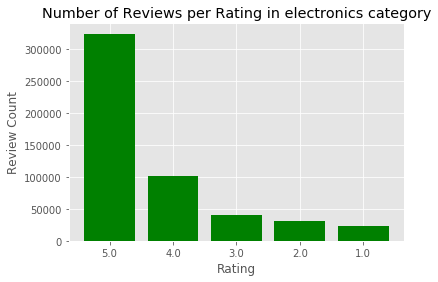

In [20]:
#graph rating vs reviews 
plt.style.use('ggplot')

x = ['5.0', '4.0', '3.0', '2.0', '1.0']
y = [323606, 100670, 40167, 30556, 22688]

plt.bar(x, y, color='green')
plt.xlabel("Rating")
plt.ylabel("Review Count")
plt.title("Number of Reviews per Rating in electronics category")

plt.show()

In [21]:
#Create a basic sentiment function to narrow down categories to analyse for lowest reviewed items/brand 

def sentiment(overall):
    if (overall == 4) or (overall == 5):
        return "Positive"
    elif (overall == 3):
        return "Neutral"
    elif (overall == 2) or (overall == 1) :
        return "Negative"

reviews['SentimentValue'] = reviews['overall'].apply(sentiment)
reviews.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive


In [22]:
#Count total for each sentiment category 
SentimentOverview = reviews['SentimentValue'].value_counts()
SentimentOverview 

Positive    424276
Negative     53244
Neutral      40167
Name: SentimentValue, dtype: int64

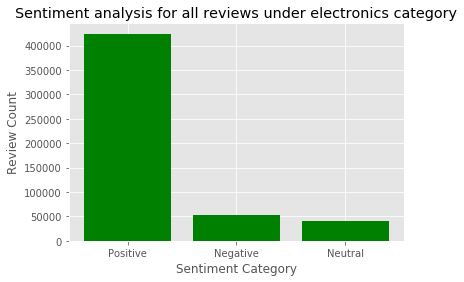

In [23]:
#graph sentiment vs number of ratings 
plt.style.use('ggplot')

x = ['Positive', 'Negative', 'Neutral']
y = [424276, 53244, 40167]

plt.bar(x, y, color='green')
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.title("Sentiment analysis for all reviews under electronics category")

plt.show()

In [25]:
#Looking at top ten brands and products 
Positive=reviews[reviews['SentimentValue']=='Positive']
Positive.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive


In [26]:
#Top 10 products with highest ratings 
BestProducts=Positive['title'].value_counts().head(10)
BestProducts

SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memory Card Speed Up To 30MB/s With Adapter, Frustration-Free Packaging - SDSDQU-064G-AFFP-A    4448
Mediabridge ULTRA Series HDMI Cable (6 Feet) - High-Speed Supports Ethernet, 3D and Audio Return [Newest Standard]                        3297
Panasonic RPHJE120D In-Ear Headphone, Orange                                                                                              2208
Google Chromecast HDMI Streaming Media Player                                                                                             1687
WD My Passport 2TB Portable External USB 3.0 Hard Drive Storage Black (WDBY8L0020BBK-NESN)                                                1669
SanDisk 2GB Class 4 SD Flash Memory Card- SDSDB-002G-B35 (Label May Change)                                                               1303
Logitech Wireless Touch Keyboard K400 with Built-In Multi-Touch Touchpad                                                                  1296

In [27]:
#Top ten brands 
BestBrands=Positive['brand'].value_counts().head(10)
BestBrands

Logitech       19716
Canon          14638
SanDisk        12924
Sony           10375
Asus            8672
Nikon           8234
Mediabridge     8208
BELKIN          8021
Panasonic       7211
Samsung         7009
Name: brand, dtype: int64

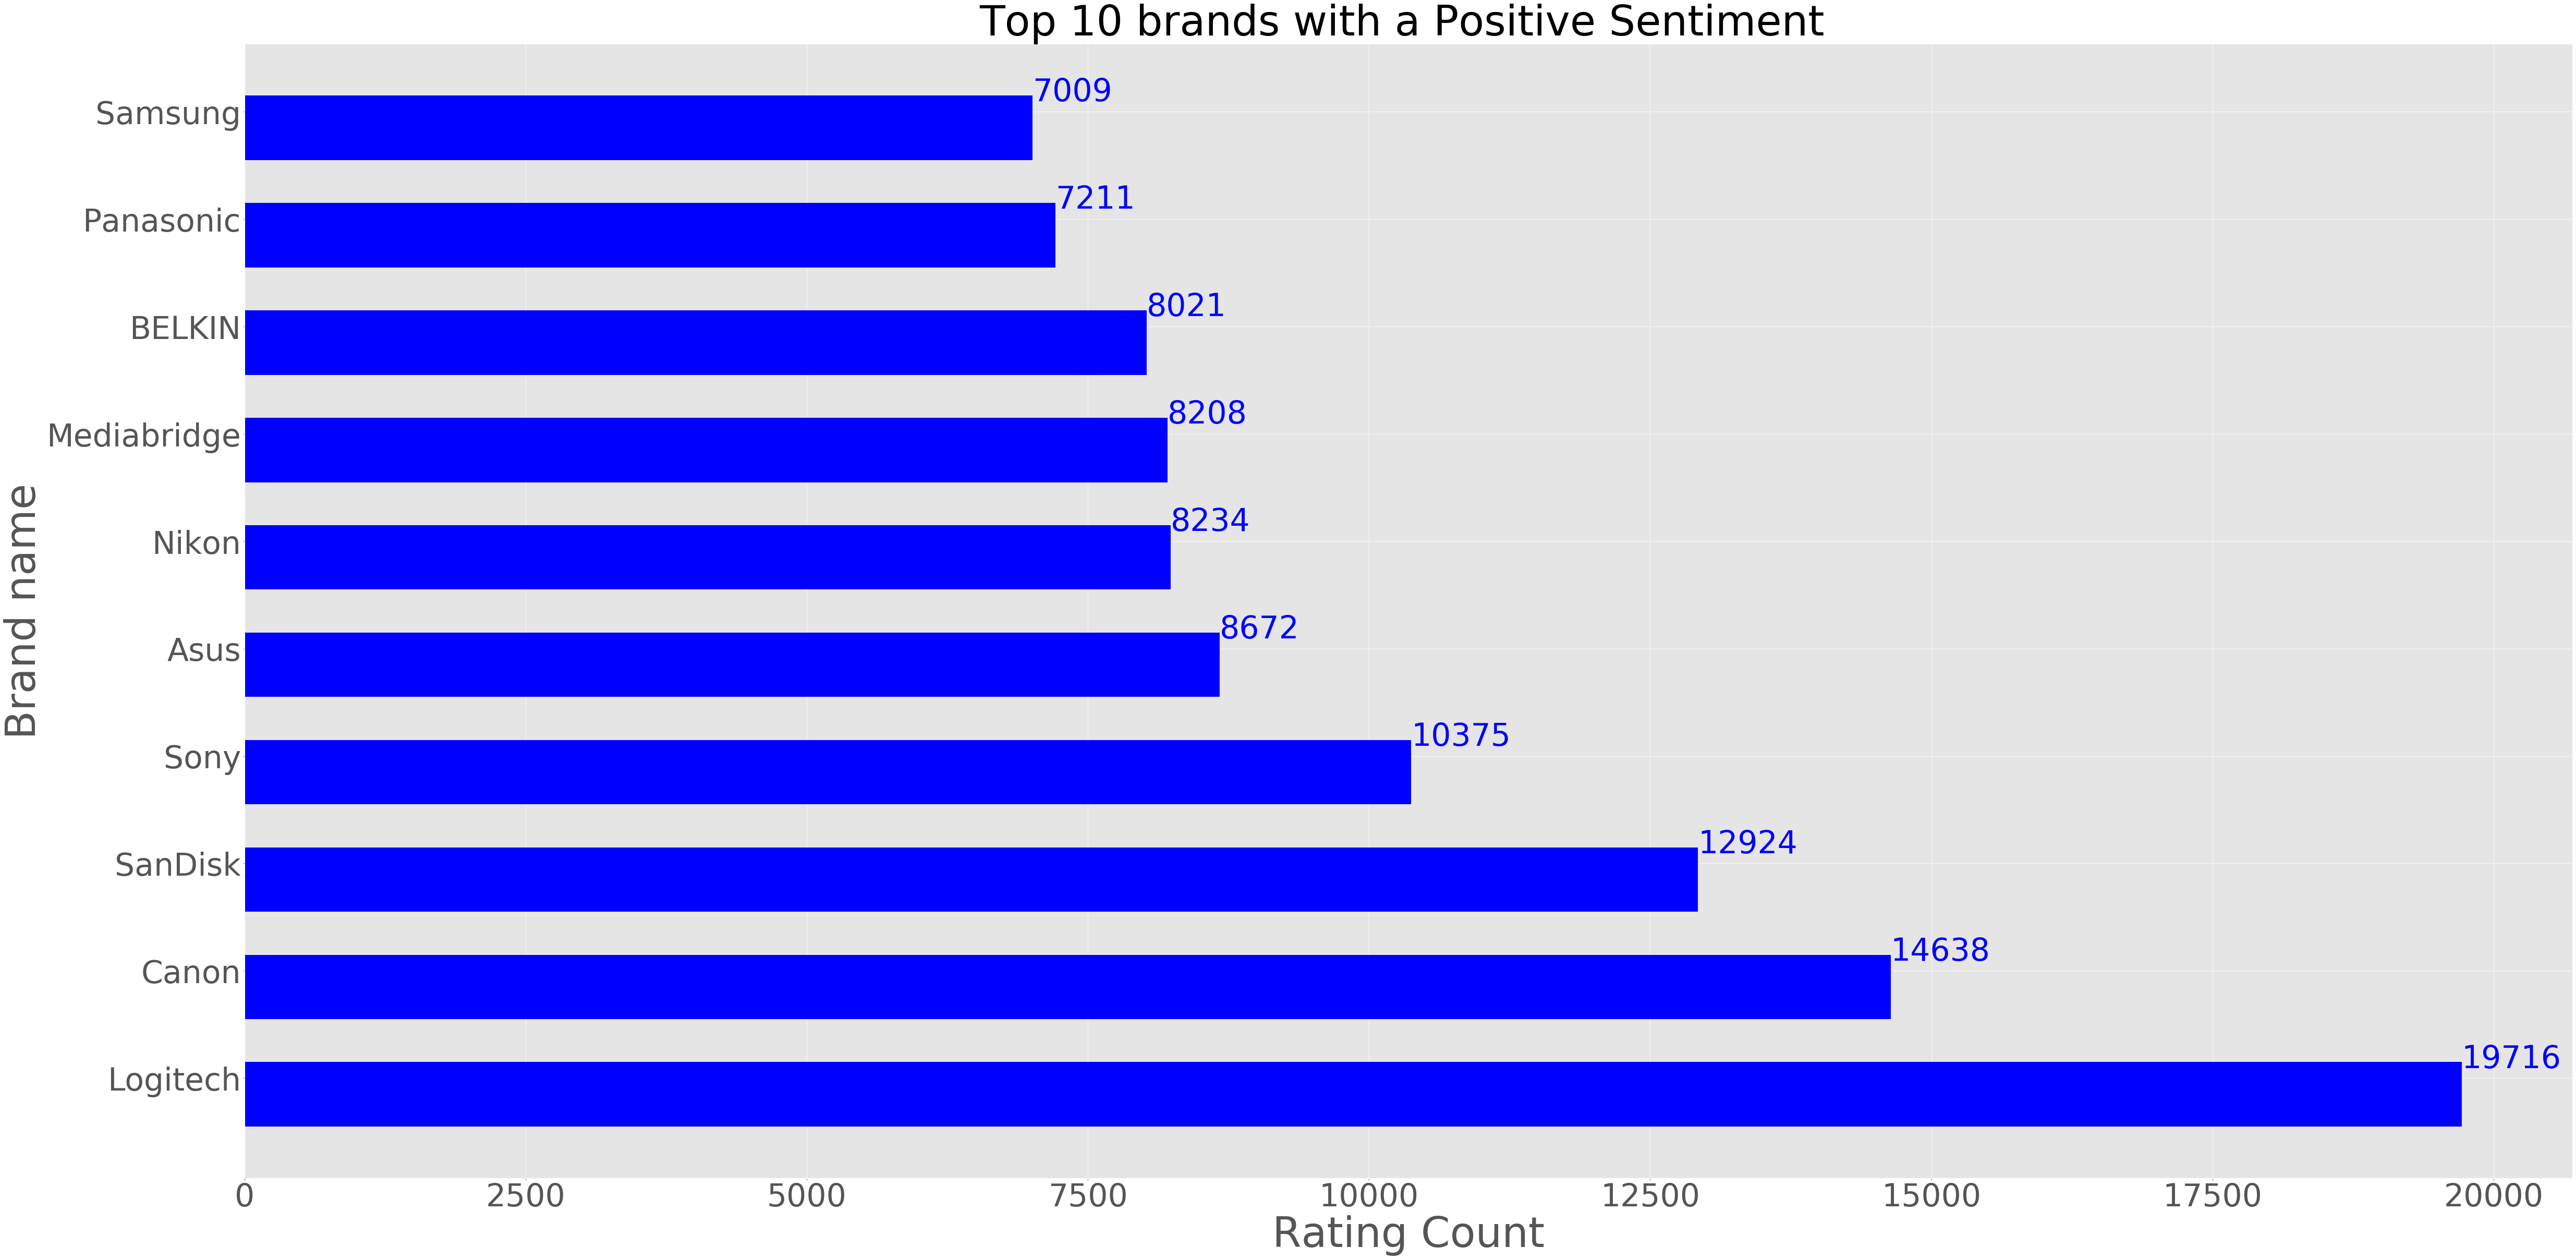

In [28]:
#Graph brands with the best ratings 
x = list(BestBrands.index)
y = list(BestBrands)

fig, ax = plt.subplots(figsize = (80,40))    
width = 0.60 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/4)
ax.set_yticklabels(x, minor=False )
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontsize=60) #add value labels into bar for more accurate reading
plt.title('Top 10 brands with a Positive Sentiment ', fontsize=80)
plt.xlabel('Rating Count', fontsize=80)
plt.ylabel('Brand name', fontsize=80)
plt.xticks( fontsize = 60)
plt.yticks( fontsize = 60)
plt.show()

In [29]:
#selecting all data points that contain a sentiment of negative & neutral 
below3 = reviews[reviews['SentimentValue'].isin(['Negative', 'Neutral'])]
below3.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue
24,A3VKO21KYDJQ2W,0972683275,"[0, 0]","For the price, you can't beat it. Mine didn't ...",3.0,Great for the price.,2011-07-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Neutral
30,A3M6S7Y1FNPOLD,0972683275,"[0, 0]","Wanted the monitor off of the desk, so we moun...",3.0,"for 25&#34; monitor, it worked well",2012-12-10,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Neutral
39,A39Z4OU2C7ENWH,0972683275,"[1, 1]",I gave this mount 3 stars.5 to start because o...,3.0,"Works, but I don't trust it",2012-02-07,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Neutral
49,A2LR9WP2JGDT8E,0972683275,"[0, 2]",The mount plate and the extender arms need to ...,2.0,screw holes don't align,2012-12-17,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Negative
52,A2JMN2JA9LSHVL,0972683275,"[1, 2]",Bought NEW but I could tell right away that mi...,1.0,"Bought NEW Stand for $25, but mine had the 4 a...",2012-12-01,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Negative


In [30]:
#Looking at the top 10 worst rated products 
WorstProducts=below3['title'].value_counts().head(5)
WorstProducts

Google Chromecast HDMI Streaming Media Player                                                                                             488
SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memory Card Speed Up To 30MB/s With Adapter, Frustration-Free Packaging - SDSDQU-064G-AFFP-A    466
Panasonic RPHJE120D In-Ear Headphone, Orange                                                                                              444
JLab JBuds Hi-Fi Noise-Reducing Ear Buds (White)                                                                                          381
Foscam FI8910W Pan &amp; Tilt IP/Network Camera with Two-Way Audio and Night Vision (Black)                                               292
Name: title, dtype: int64

In [31]:
#analysing the top 10 brands with the highest number of poor ratings 
top10 = below3['brand'].value_counts().head(10)
top10

Logitech     4307
Generic      2069
Canon        1966
Sony         1905
Asus         1877
Netgear      1691
BELKIN       1566
Panasonic    1467
SanDisk      1365
Microsoft    1268
Name: brand, dtype: int64

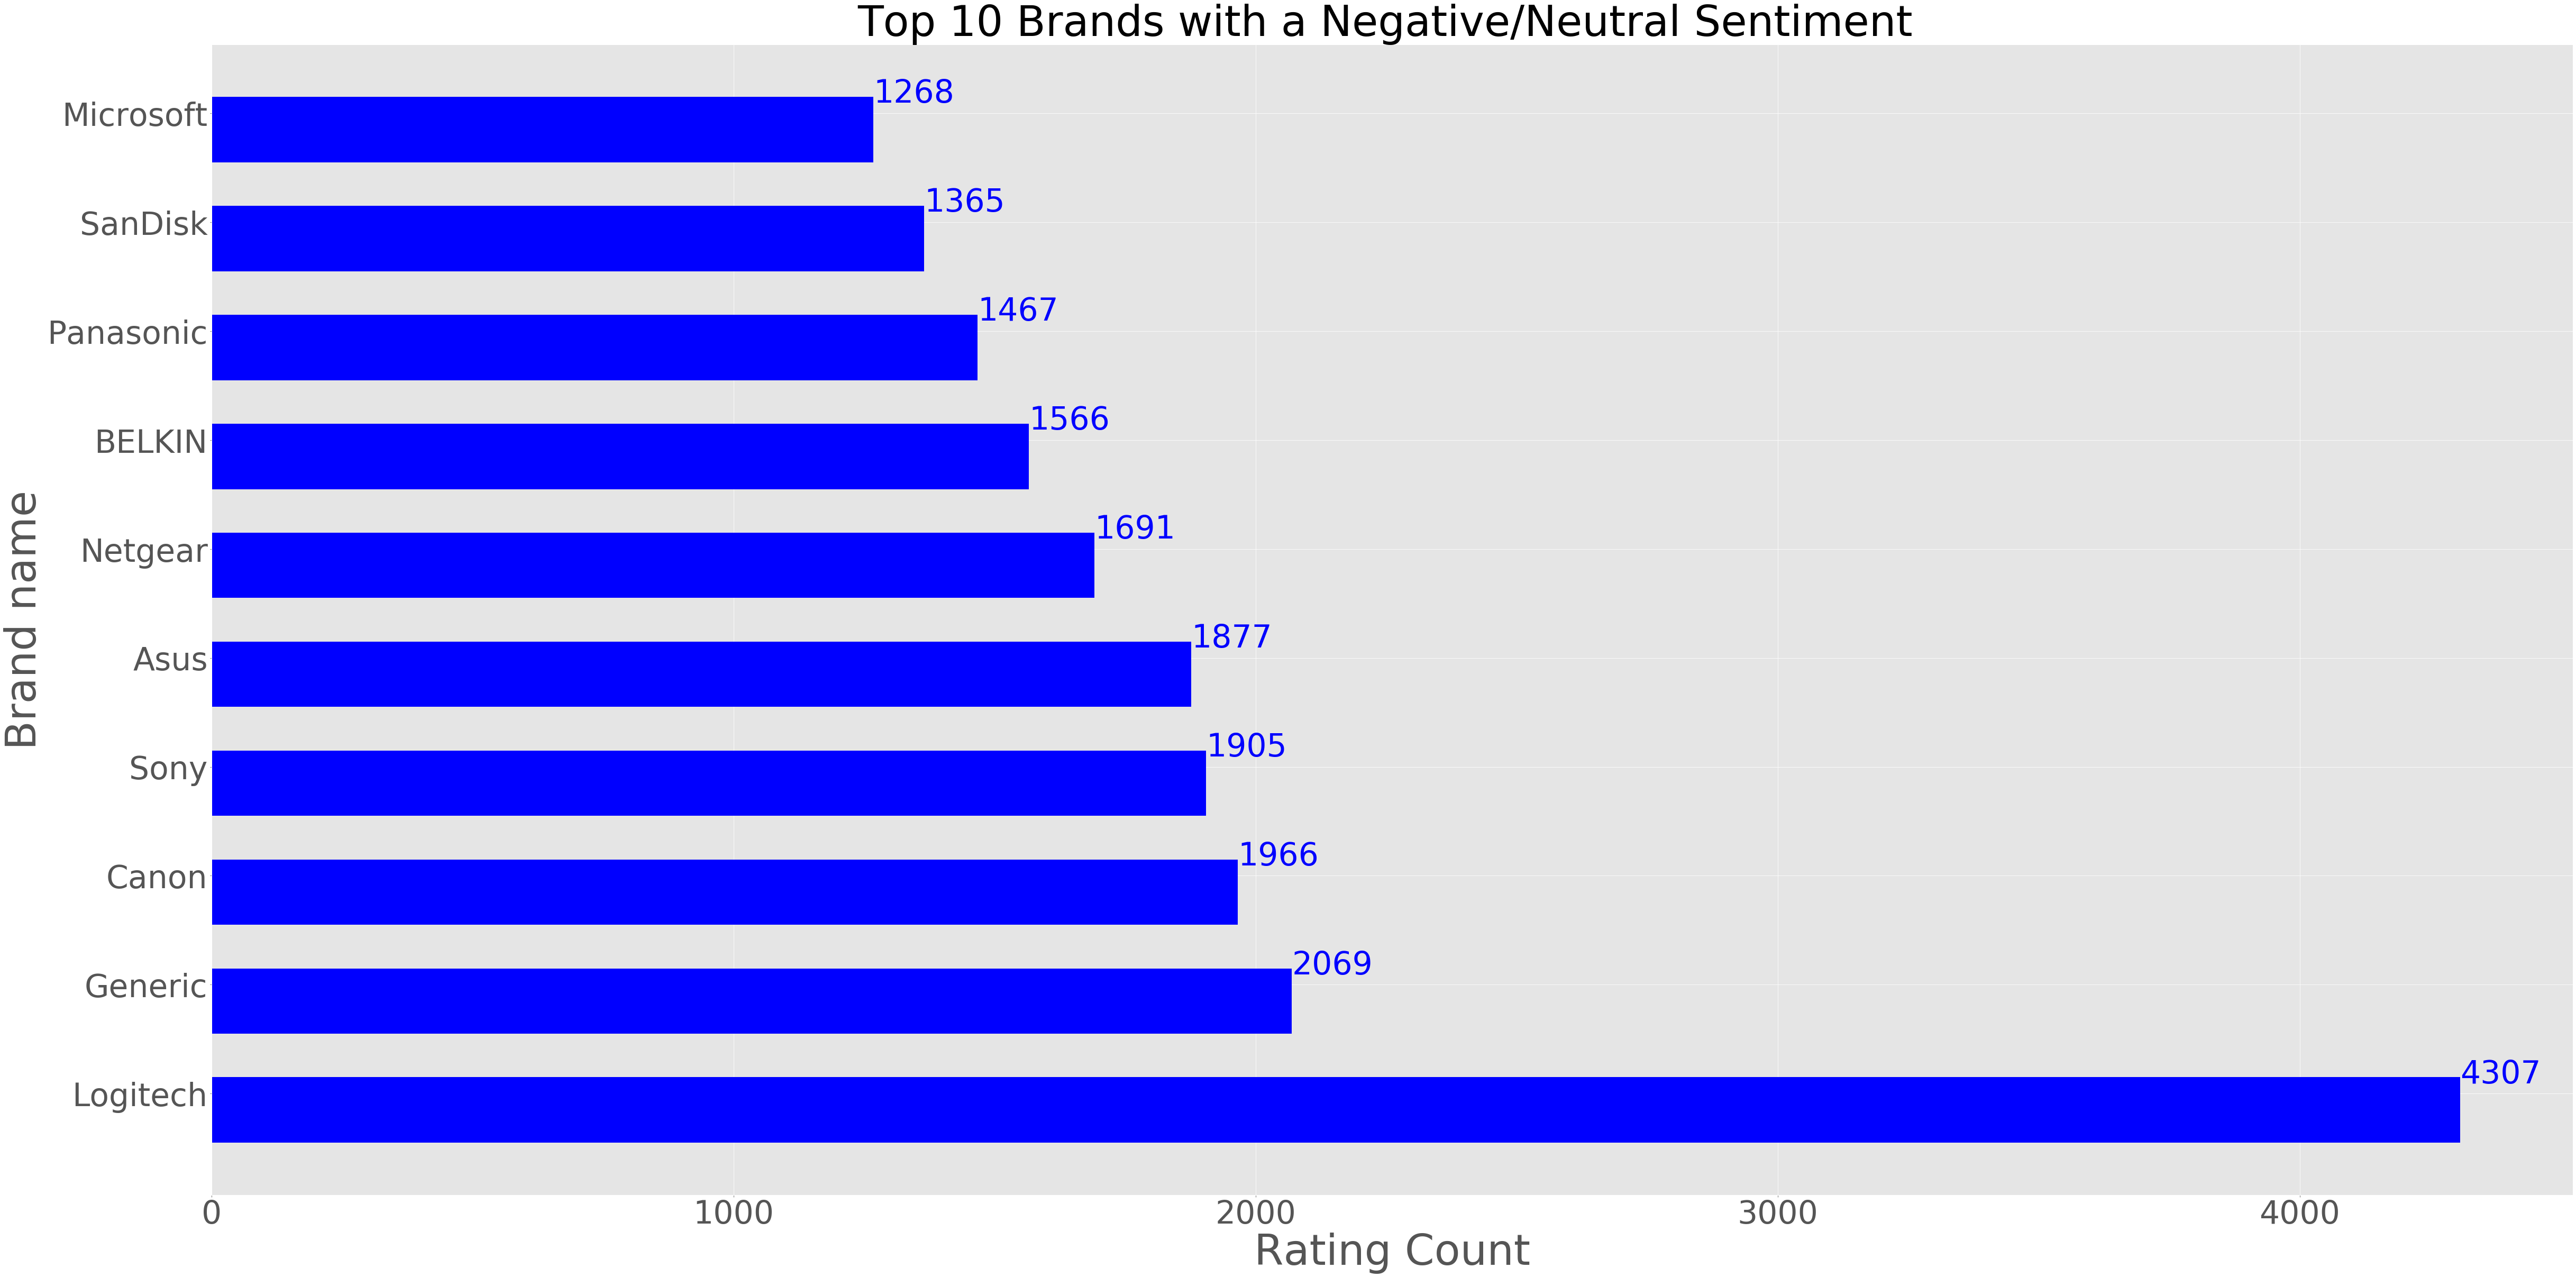

In [32]:
#graph the top 10 brands with lowest ratings 
x = list(top10.index)
y = list(top10)

fig, ax = plt.subplots(figsize = (80,40))    
width = 0.60 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/4)
ax.set_yticklabels(x, minor=False )
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontsize=60) #add value labels into bar for more accurate reading
plt.title('Top 10 Brands with a Negative/Neutral Sentiment ', fontsize=80)
plt.xlabel('Rating Count', fontsize=80)
plt.ylabel('Brand name', fontsize=80)
plt.xticks( fontsize = 60)
plt.yticks( fontsize = 60)
plt.show()

In [33]:
#Visualising the total number of reviews for each of these brands to further understand what percentage of each was poor rating
reviews['brand'].value_counts().head(10)

Logitech       24023
Canon          16604
SanDisk        14289
Sony           12280
Asus           10549
BELKIN          9587
Nikon           9426
Mediabridge     8797
Panasonic       8678
Generic         8151
Name: brand, dtype: int64

In [34]:
#Considering that logitech had 24023 total reviews and with 4307 being below 3, almost 20% were labelled as not good. 

#Initally creating a word cloud with the review text from these reviews to visualse key words 

#create dataframe with poor reviews for just Logitech
logitech = below3.loc[below3['brand'] == 'Logitech']
logitech

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue
3678,A23HCR977WY1YN,B00004VUGJ,"[1, 1]",My wrists have been bothering me and I was tol...,3.0,Decent Trackball Mouse with a Few Drawbacks,2010-03-18,The Logitech Cordless TrackMan Wheel provides ...,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Cordless TrackMan Wheel,239.99,"{'also_viewed': ['B0043T7FXE', 'B001F42MKG', '...",Logitech,Neutral
3683,AZ0SIZRQWN7RC,B00004VUGJ,"[2, 5]",The one piece of wisdom one should take away f...,3.0,Different strokes,2007-05-27,The Logitech Cordless TrackMan Wheel provides ...,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Cordless TrackMan Wheel,239.99,"{'also_viewed': ['B0043T7FXE', 'B001F42MKG', '...",Logitech,Neutral
3685,ACXA3WB00T388,B00004VUGJ,"[2, 2]",When I bought my wireless Logitech trackball t...,1.0,What's with that price?,2012-08-18,The Logitech Cordless TrackMan Wheel provides ...,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Cordless TrackMan Wheel,239.99,"{'also_viewed': ['B0043T7FXE', 'B001F42MKG', '...",Logitech,Negative
3692,A1K6MT7I2NII2J,B00004VUGJ,"[0, 1]",This is generally an OK product but it seems t...,3.0,Logitech Got It Backwards,2010-01-14,The Logitech Cordless TrackMan Wheel provides ...,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Cordless TrackMan Wheel,239.99,"{'also_viewed': ['B0043T7FXE', 'B001F42MKG', '...",Logitech,Neutral
3693,A3EERJGK0VGUM7,B00004VUGJ,"[5, 18]",I bought this because of the design. However t...,1.0,No Mac support,2001-01-02,The Logitech Cordless TrackMan Wheel provides ...,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Cordless TrackMan Wheel,239.99,"{'also_viewed': ['B0043T7FXE', 'B001F42MKG', '...",Logitech,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517079,A3AVJCB1ZD6ZY5,B00J2LIC44,"[3, 10]",We have a Logitech wireless keyboard for our c...,2.0,Not as usable as my old Logitech,2014-06-26,NaN,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Illuminated Living-Room Wireless Keyb...,109.99,"{'also_bought': ['B00DR9V1T0', 'B00HZDLNWO', '...",Logitech,Negative
517082,A2P0Y85C896QIB,B00J2LIC44,"[2, 3]",This keyboard is a huge disappointment. For t...,2.0,This keyboard is a huge disappointmen,2014-07-05,NaN,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Illuminated Living-Room Wireless Keyb...,109.99,"{'also_bought': ['B00DR9V1T0', 'B00HZDLNWO', '...",Logitech,Negative
517083,AJ0D9I34SY6JB,B00J2LIC44,"[9, 17]",I bought my k830 directly from Logitech hoping...,3.0,Good keyboard; lighting unsuited for general c...,2014-05-19,NaN,"[['Electronics', 'Computers & Accessories', 'C...",Logitech Illuminated Living-Room Wireless Keyb...,109.99,"{'also_bought': ['B00DR9V1T0', 'B00HZDLNWO', '...",Logitech,Neutral
517592,A20OBCQWBKCGZT,B00KK9481I,"[0, 0]",I was very disappointed with these speakers. T...,3.0,"Spend a little more for better sound quality, ...",2014-07-21,NaN,"[['Electronics', 'Home Audio', 'Stereo Compone...",Logitech Multimedia Speakers Z213 (2.1 Stereo ...,30.65,"{'also_viewed': ['B002HWRZ2K', 'B0015C30J0', '...",Logitech,Neutral


In [35]:
#functions needed for word cloud

def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore


# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'
    



In [36]:
logitech['reviewText'] = logitech['reviewText'].astype('str') 

Selected_Rows=logitech
Selected_Rows['Sentiment_Score']=Selected_Rows['reviewText'].apply(lambda x: sentimental_Score(x))



In [37]:
pos = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'pos']
neg = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'neg']

In [38]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["reviewText"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

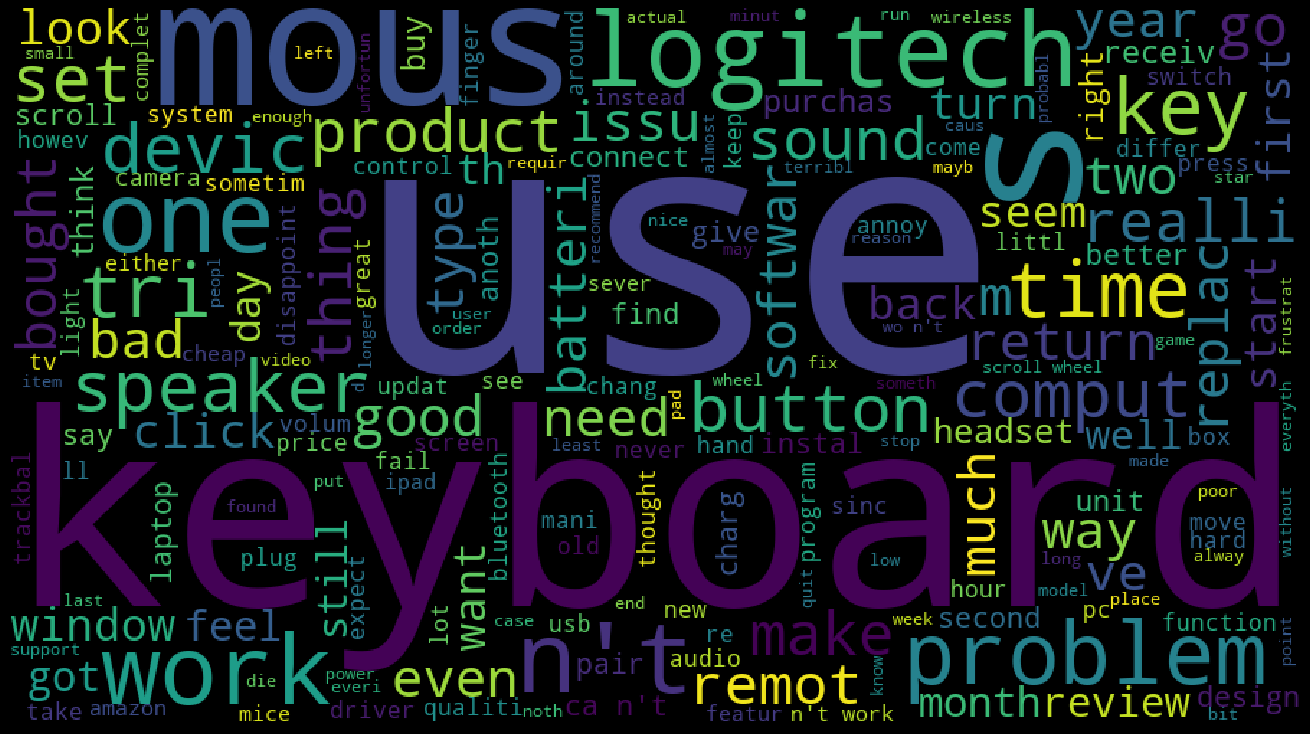

In [39]:
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))
plot_Cloud(neg_wordcloud)

In [40]:
#View the worst rated products for logitech 
#Common theme that people rate wireless products poorly
logitech['title'].value_counts().head(10)


Logitech Wireless Touch Keyboard K400 with Built-In Multi-Touch Touchpad    263
Logitech Wireless Performance Mouse MX for PC and Mac                       185
Logitech S120 2.0 Multimedia Speakers                                       176
Logitech Harmony 650 Remote Control (Silver)                                172
Logitech M510 Wireless Mouse                                                153
Logitech M570  Wireless Trackball                                           144
Logitech S150 USB Speakers with Digital Sound                               110
Logitech Wireless Solar Keyboard K750                                        97
Logitech Wireless Desktop MK320 Combo                                        85
Logitech Illuminated Ultrathin Keyboard with Backlighting                    82
Name: title, dtype: int64

In [41]:
#Moving onto statistical and predicitve analysis

#make two extra columns splitting up the time column into year and date 

reviews['ReviewTime']= pd.to_datetime(reviews['ReviewTime'])

reviews['Month']=reviews['ReviewTime'].dt.month

reviews['Year']=reviews['ReviewTime'].dt.year

reviews.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,4,2013
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,12,2011
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,11,2013
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,8,2010
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,5,2013


In [42]:
#compute graphs showing reviews by year and month 

PerYear=reviews.groupby(['Year'])['reviewerID'].count().reset_index() #reseting index allows cronoloigcal ordering of years 
PerYear.head()

,Year,reviewerID
0,1999,3
1,2000,67
2,2001,93
3,2002,155
4,2003,313


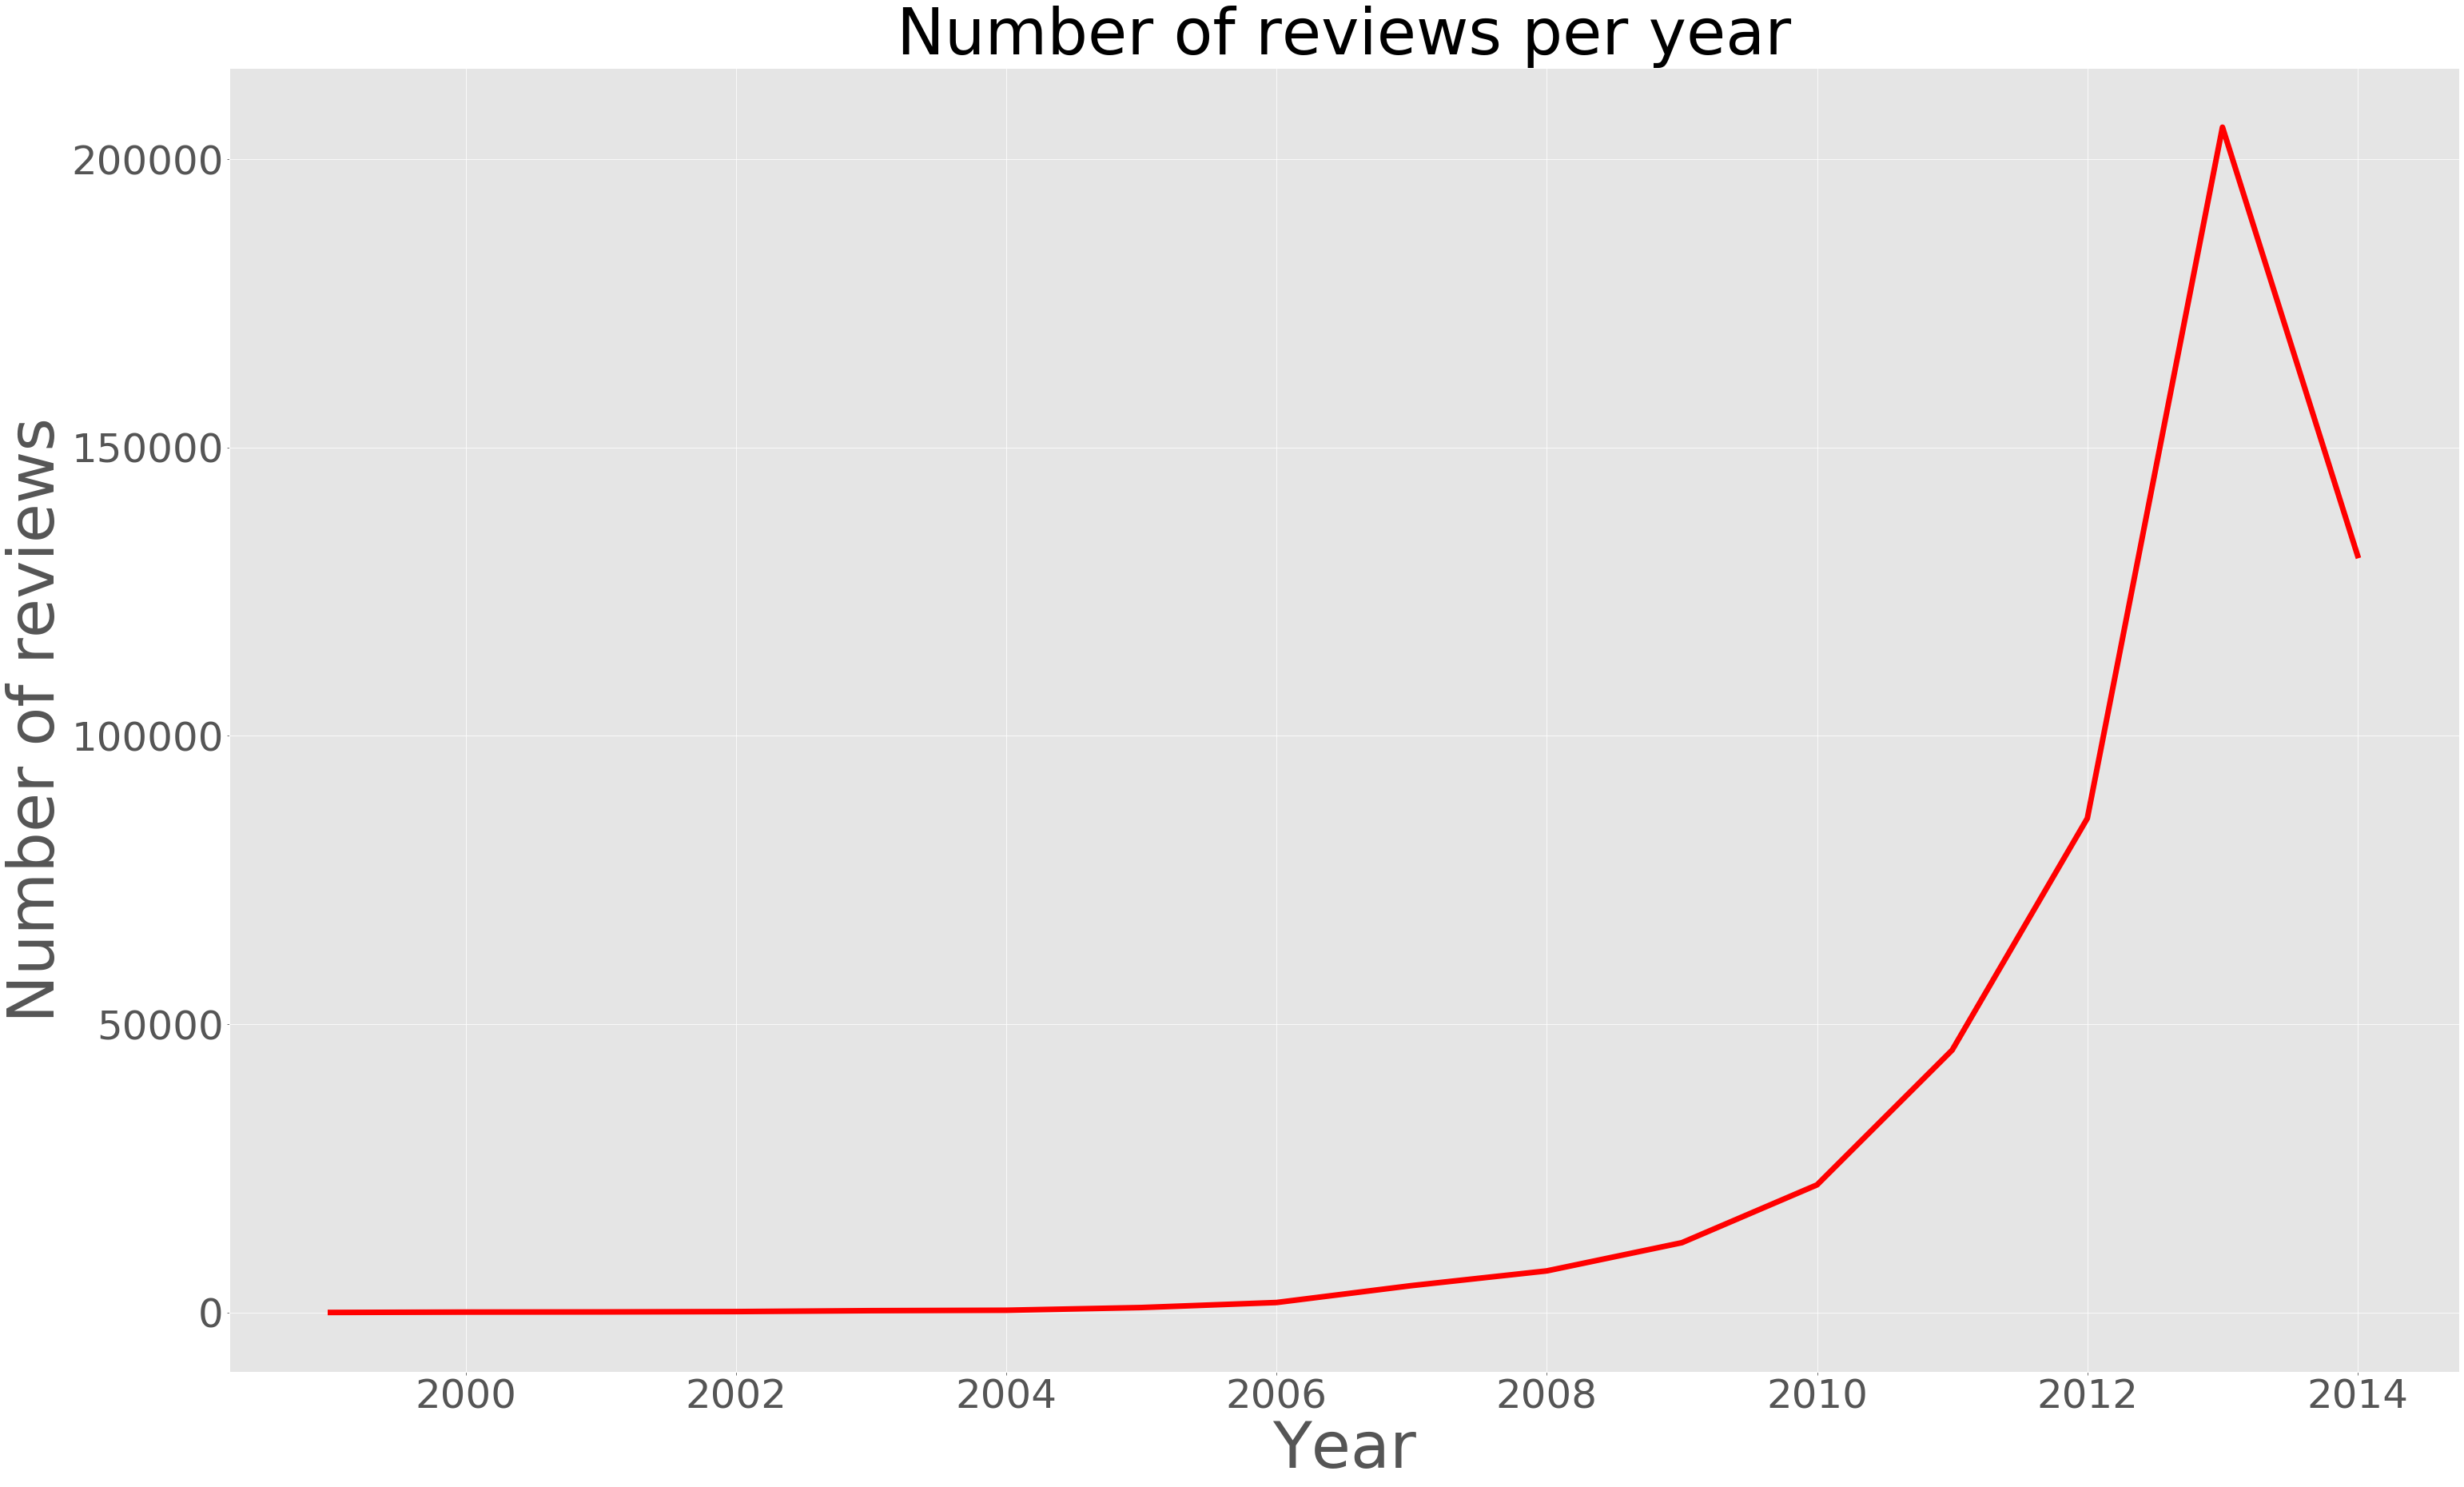

In [43]:
plt.figure(figsize=(50,30))
plt.plot(PerYear['Year'],PerYear['reviewerID'], color='red', linewidth=7.0)
plt.title('Number of reviews per year', fontsize = 80)
plt.xlabel('Year', fontsize = 80)
plt.ylabel('Number of reviews', fontsize= 80)
plt.grid(True)
plt.xticks( fontsize = 50)
plt.yticks( fontsize = 50)
plt.show()


In [44]:
#Looking at reviews per month
PerMonth=reviews.groupby(['Month'])['reviewerID'].count().reset_index()
PerMonth['Month'] = PerMonth['Month'].astype(int)
PerMonth.head()

,Month,reviewerID
0,1,58293
1,2,48077
2,3,50536
3,4,46113
4,5,45690


In [45]:
#Changing month for number to actual month
PerMonth['Month'] = PerMonth['Month'].apply(lambda x: calendar.month_name[x])
PerMonth.head()

,Month,reviewerID
0,January,58293
1,February,48077
2,March,50536
3,April,46113
4,May,45690


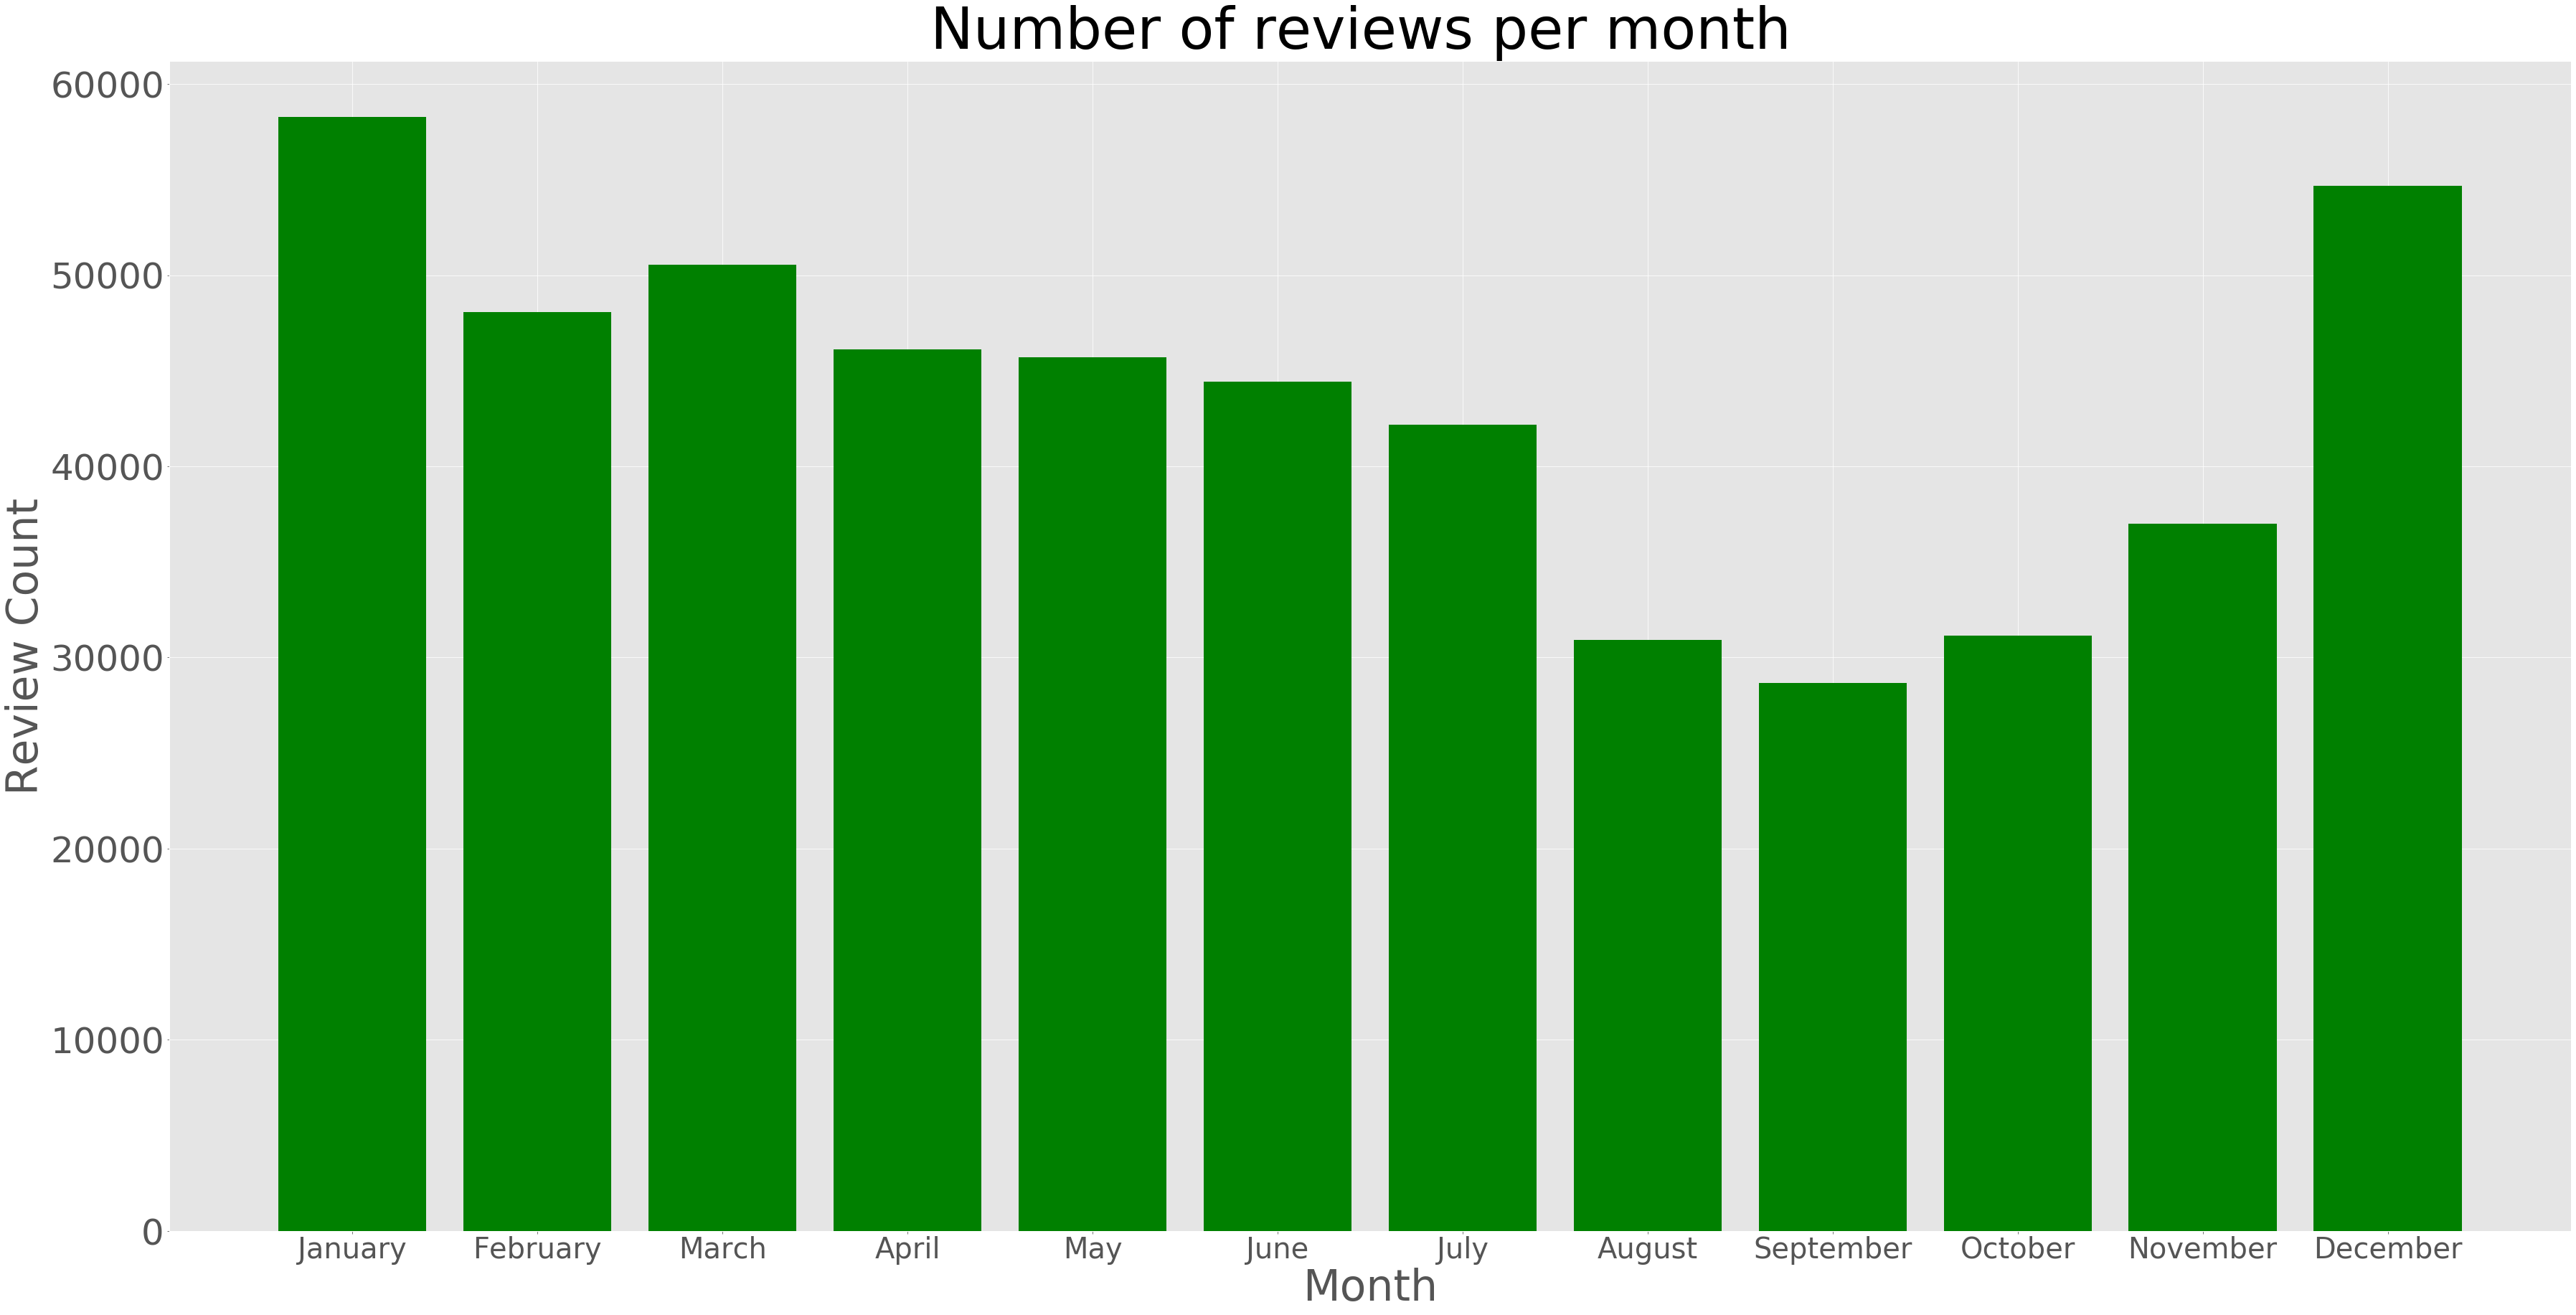

In [46]:
plt.figure(figsize=(60,30))
plt.bar(PerMonth['Month'], PerMonth['reviewerID'], color='green')
plt.xlabel("Month", fontsize = 60)
plt.ylabel("Review Count" ,fontsize = 60)
plt.title("Number of reviews per month ", fontsize = 80)
plt.xticks( fontsize = 40)
plt.yticks( fontsize = 50)


plt.show()

In [47]:
#based on product price visualising revenue per month and year 
Msales = reviews.groupby('Month').sum().reset_index()
Msales

,Month,overall,price,Year
0,1,250760.0,4.242883e+06,117337809
1,2,207005.0,3.423111e+06,96773431
2,3,217568.0,3.660949e+06,101723847
3,4,197914.0,3.435485e+06,92818875
4,5,195212.0,3.402371e+06,91964726
5,6,189854.0,3.430236e+06,89399101
6,7,181083.0,3.221769e+06,84869603
7,8,131273.0,2.292918e+06,62204542
8,9,122107.0,2.127323e+06,57658098
9,10,132656.0,2.338130e+06,62634872


In [48]:
Msales['Month'] = Msales['Month'].apply(lambda x: calendar.month_name[x])
Msales

,Month,overall,price,Year
0,January,250760.0,4.242883e+06,117337809
1,February,207005.0,3.423111e+06,96773431
2,March,217568.0,3.660949e+06,101723847
3,April,197914.0,3.435485e+06,92818875
4,May,195212.0,3.402371e+06,91964726
5,June,189854.0,3.430236e+06,89399101
6,July,181083.0,3.221769e+06,84869603
7,August,131273.0,2.292918e+06,62204542
8,September,122107.0,2.127323e+06,57658098
9,October,132656.0,2.338130e+06,62634872


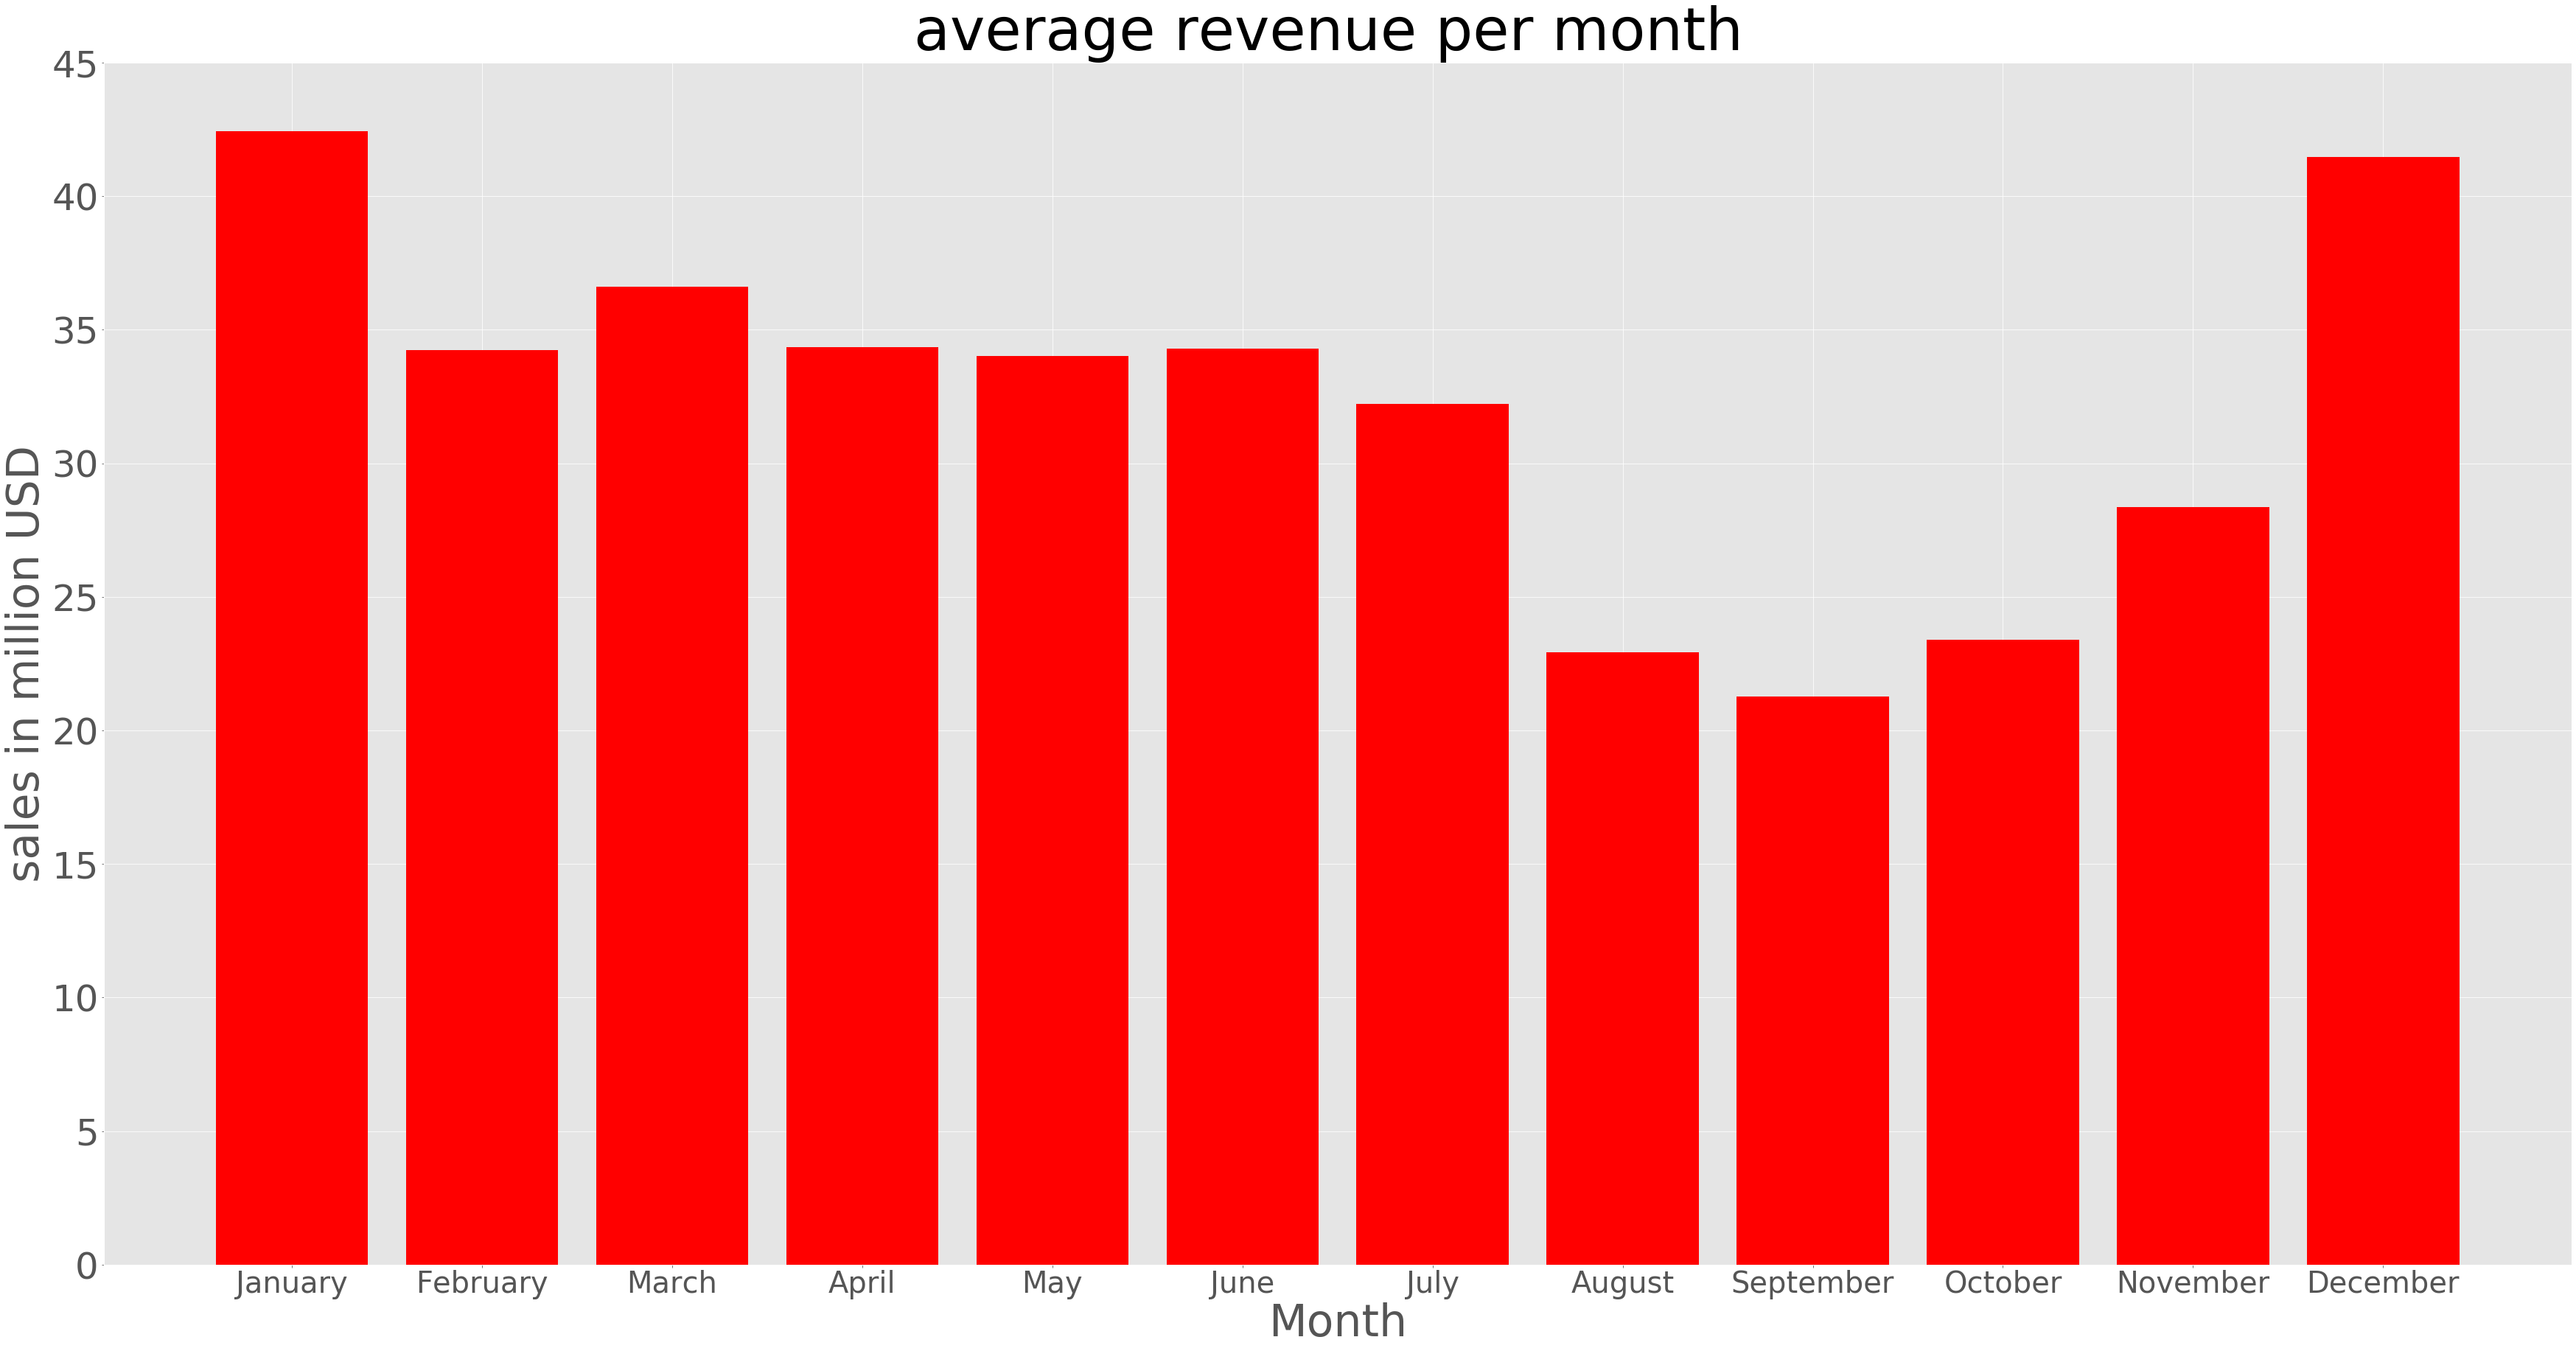

In [49]:
plt.figure(figsize=(60,30))
plt.bar(Msales['Month'], Msales['price'], color='red')
plt.xlabel("Month", fontsize = 60)
plt.ylabel("sales in million USD" ,fontsize = 60)
plt.title("average revenue per month ", fontsize = 80)
labels, location = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int), fontsize = 50)
plt.xticks( fontsize = 40)



plt.show()

In [50]:
#Revenue per year 
Ysales = reviews.groupby('Year').sum().reset_index()
Ysales

,Year,overall,price,Month
0,1999,14.0,3.099900e+02,36
1,2000,289.0,5.833200e+03,555
2,2001,373.0,6.899050e+03,633
3,2002,597.0,1.317618e+04,1218
4,2003,1253.0,2.732069e+04,2014
5,2004,1500.0,4.460056e+04,2894
6,2005,3425.0,1.025044e+05,6461
7,2006,7088.0,2.089923e+05,11813
8,2007,19939.0,4.603138e+05,31171
9,2008,30647.0,7.869792e+05,48902


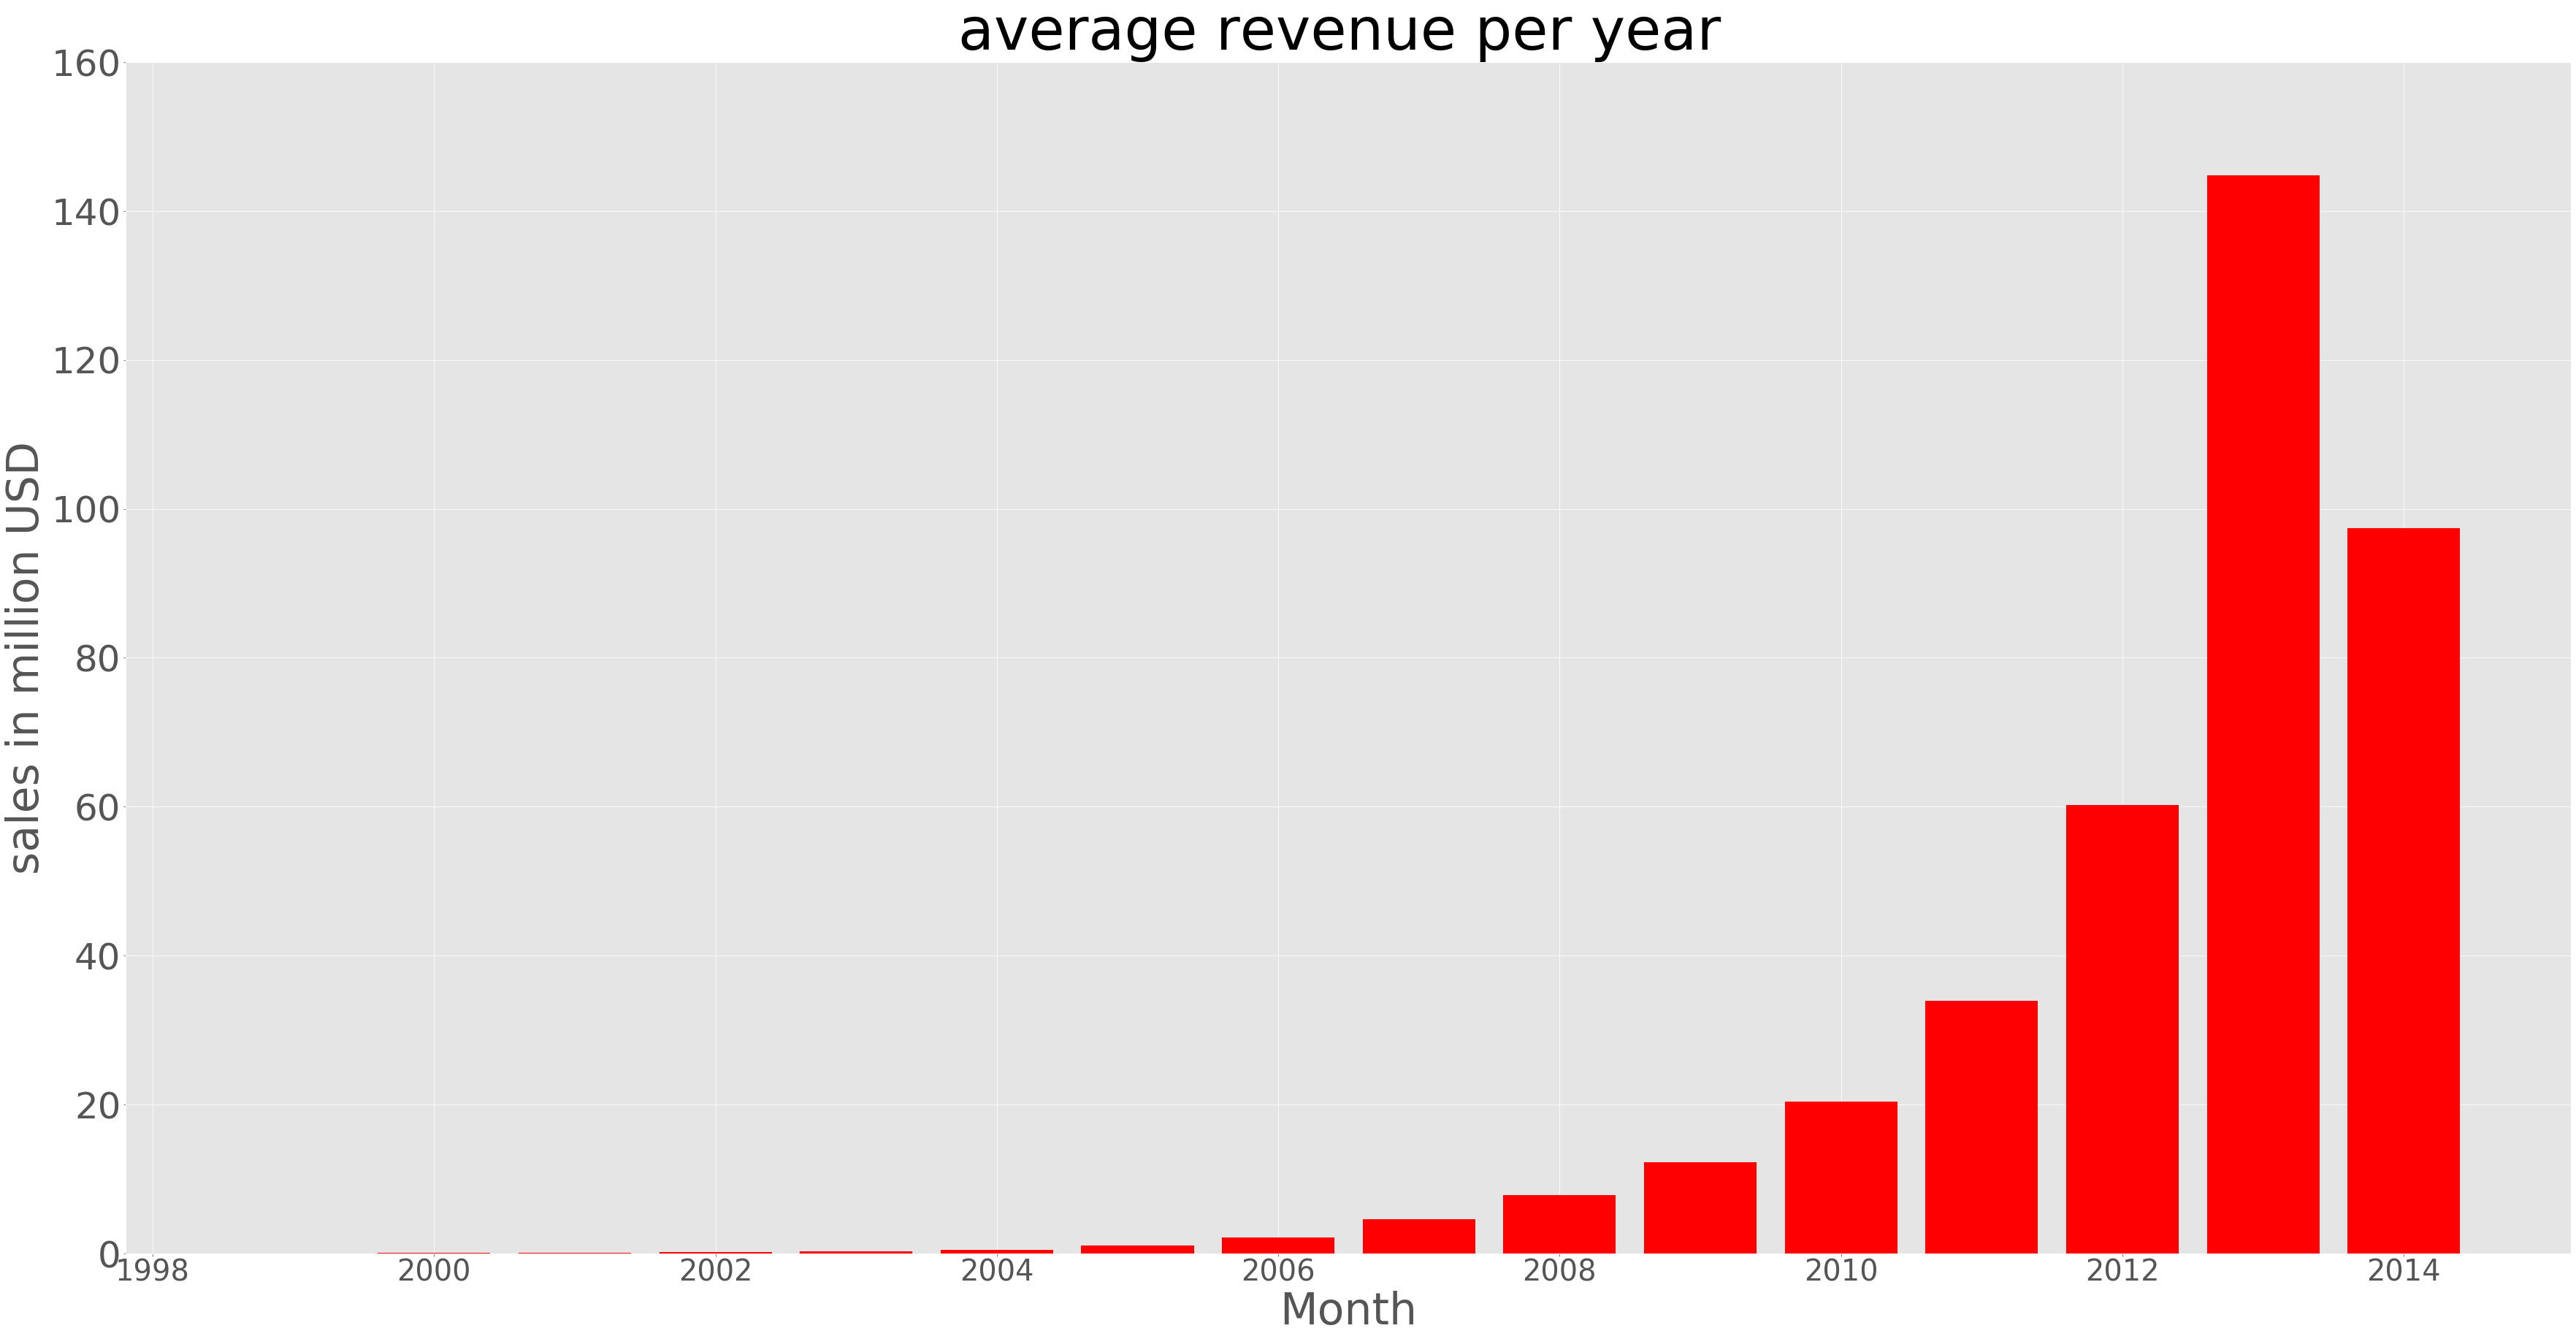

In [51]:
plt.figure(figsize=(60,30))
plt.bar(Ysales['Year'], Ysales['price'], color='red')
plt.xlabel("Month", fontsize = 60)
plt.ylabel("sales in million USD" ,fontsize = 60)
plt.title("average revenue per year ", fontsize = 80)
labels, location = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int), fontsize = 50)
plt.xticks( fontsize = 40)



plt.show()

In [52]:
#Average reviews posted via day 

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

reviews['day'] = reviews['ReviewTime'].dt.weekday.map(dw_mapping)
reviews.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year,day
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,4,2013,Tuesday
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,12,2011,Friday
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,11,2013,Saturday
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,8,2010,Monday
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,5,2013,Sunday


In [53]:
PerDay=reviews.groupby(['day'])['reviewerID'].count()
PerDay

day
Friday       74043
Monday       78053
Saturday     66297
Sunday       63927
Thursday     78123
Tuesday      78240
Wednesday    79004
Name: reviewerID, dtype: int64

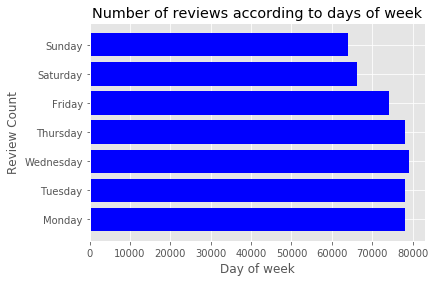

In [54]:
plt.style.use('ggplot')

x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = [78053, 78240, 79004, 78123, 74043, 66297, 63927]

plt.barh(x, y, color='blue')
plt.xlabel("Day of week")
plt.ylabel("Review Count")
plt.title("Number of reviews according to days of week")

plt.show()

In [55]:
#average rating per year with moving average 
df=reviews.groupby(['Year'])['overall'].mean().reset_index()
df.head()

,Year,overall
0,1999,4.666667
1,2000,4.313433
2,2001,4.010753
3,2002,3.851613
4,2003,4.003195


In [56]:
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Year','overall'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['overall'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Year'] = moving_average_df['Year'].astype(int)
    return moving_average_df



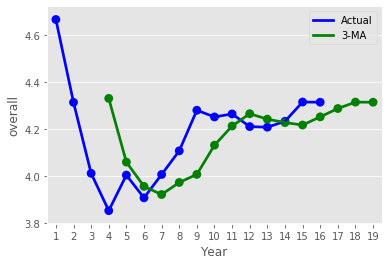

In [57]:
f, ax = plt.subplots(1, 1)
ma_df = moving_average(df, 3, 19)
sns.pointplot(x='Year', y='overall', data=df, color='b')
sns.pointplot(x='Year', y='overall', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.show()

In [58]:
#top product via quartly intervals 
xmas = reviews[reviews['Month'].isin(['12', '1', '11'])]
xmas.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year,day
1,A1EDI0X3GI1SK7,0972683275,"[0, 1]","Great deal, easy to mount and it appears to be...",5.0,32 In TV Mount,2011-12-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,12,2011,Friday
2,A3BMUBUC1N77U8,0972683275,"[0, 0]",This mount works really well once you get it u...,4.0,"Pretty simple, but definitely good!",2013-11-23,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,11,2013,Saturday
5,A371ZZ95ZQEIZV,0972683275,"[0, 0]","I received the mount, which was well packaged ...",4.0,"Sturdy Mount, good customer service",2014-01-07,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,1,2014,Tuesday
10,A3CCITVF0WL6KE,0972683275,"[0, 0]",I am very glad for buying it. It is heavy dut...,5.0,VideoSecu Swing Arm TV Wall Mount,2013-01-09,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,1,2013,Wednesday
16,A23A7OH3AM0PDA,0972683275,"[0, 0]","I installed this for my sister who had a 22"" P...",4.0,"Nice Mount, beware of cable connections",2011-01-27,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,1,2011,Thursday


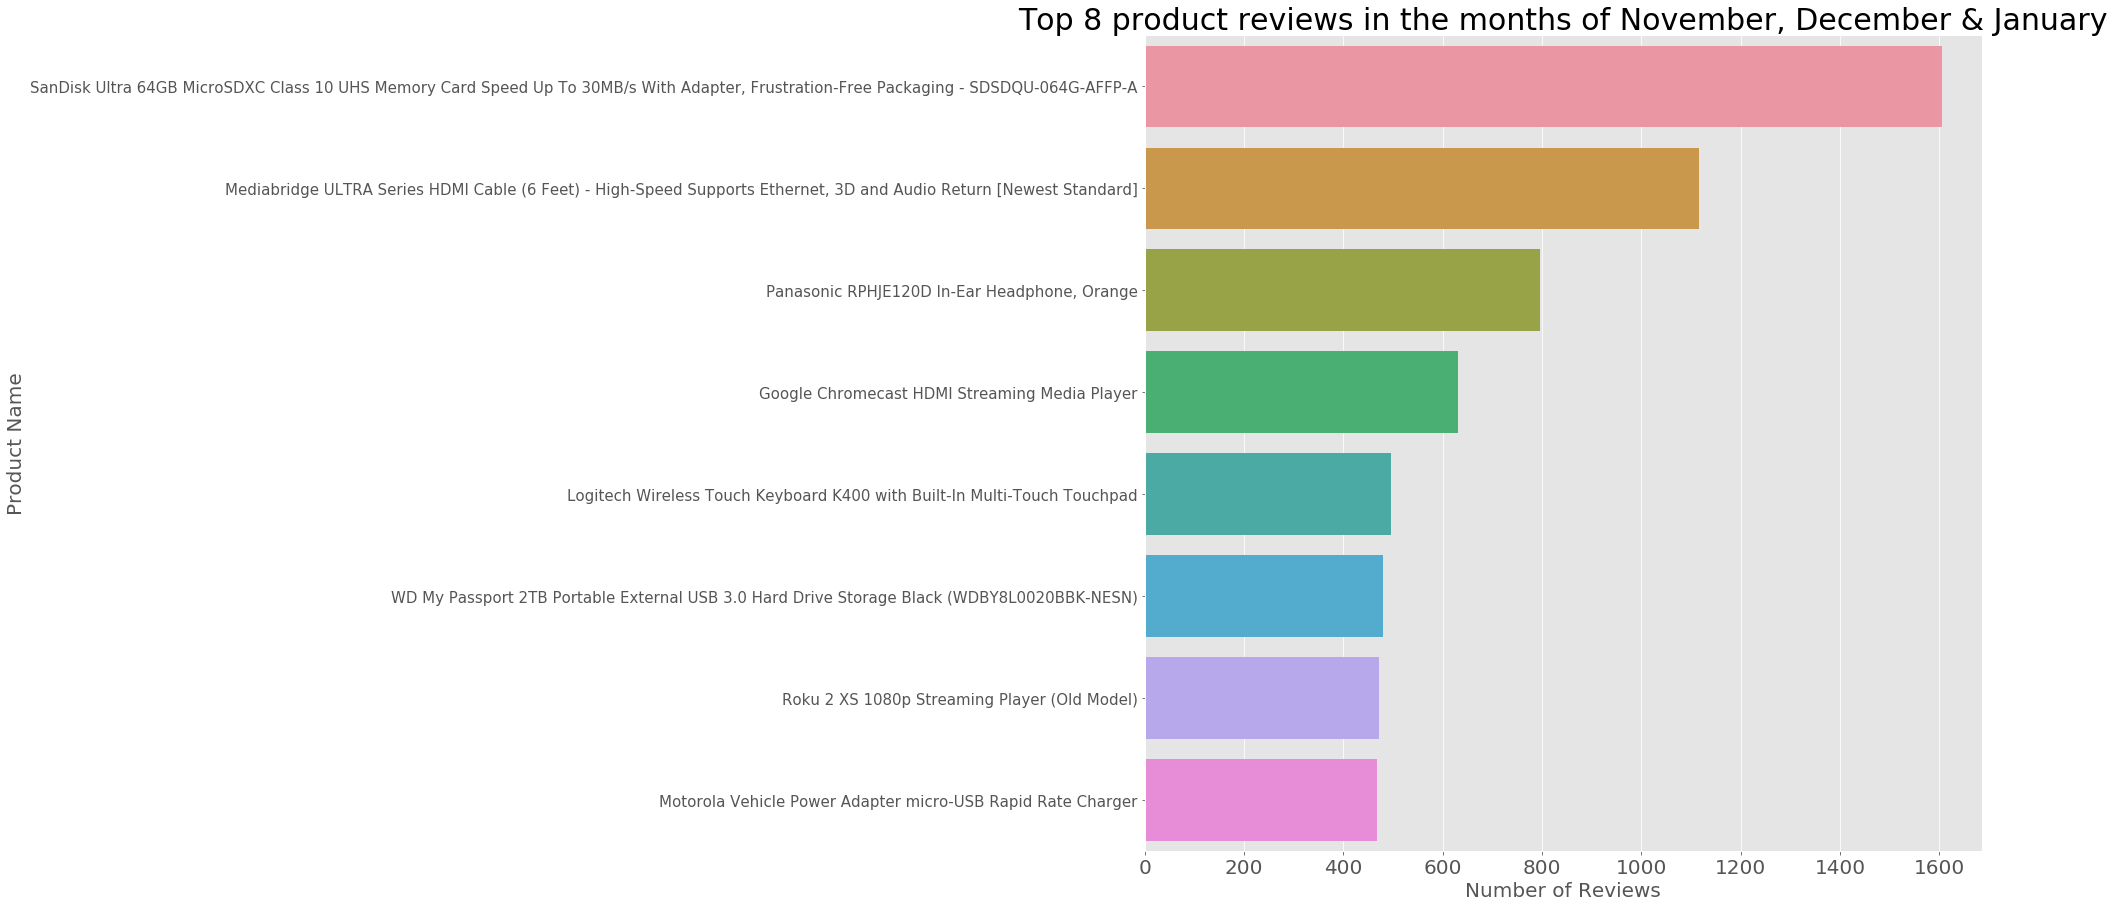

In [59]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'title', data=xmas,order=xmas.title.value_counts().head(8).index)
plt.title('Top 8 product reviews in the months of November, December & January', fontsize = 30)
plt.xlabel('Number of Reviews', fontsize = 20)
plt.ylabel('Product Name', fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 20)
plt.show()

In [60]:
midyear = reviews[reviews['Month'].isin(['5', '6', '7'])]
midyear.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year,day
4,A3UOSOCRKS3WIH,0972683275,"[0, 0]",for the price you just cant beat this item. I ...,5.0,Cant Beat it!,2013-05-12,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,5,2013,Sunday
6,A7060R14RJF3I,0972683275,"[0, 0]","Took a bit of work, but used this to fit an ol...",4.0,Works,2013-05-18,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,5,2013,Saturday
11,AYQNWE3AX4H08,0972683275,"[0, 0]",this holds up my 55inch sony with ease. make s...,5.0,work great,2013-07-18,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,7,2013,Thursday
12,A3P24ZSF9IQRJJ,0972683275,"[0, 0]",Nice quality still works great... very happy w...,5.0,great,2014-06-13,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,6,2014,Friday
13,A1JI3XL5ME8CWM,0972683275,"[0, 0]",Great bracket for small TVs. I used it on a 1...,4.0,Great product for money,2012-05-08,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,5,2012,Tuesday


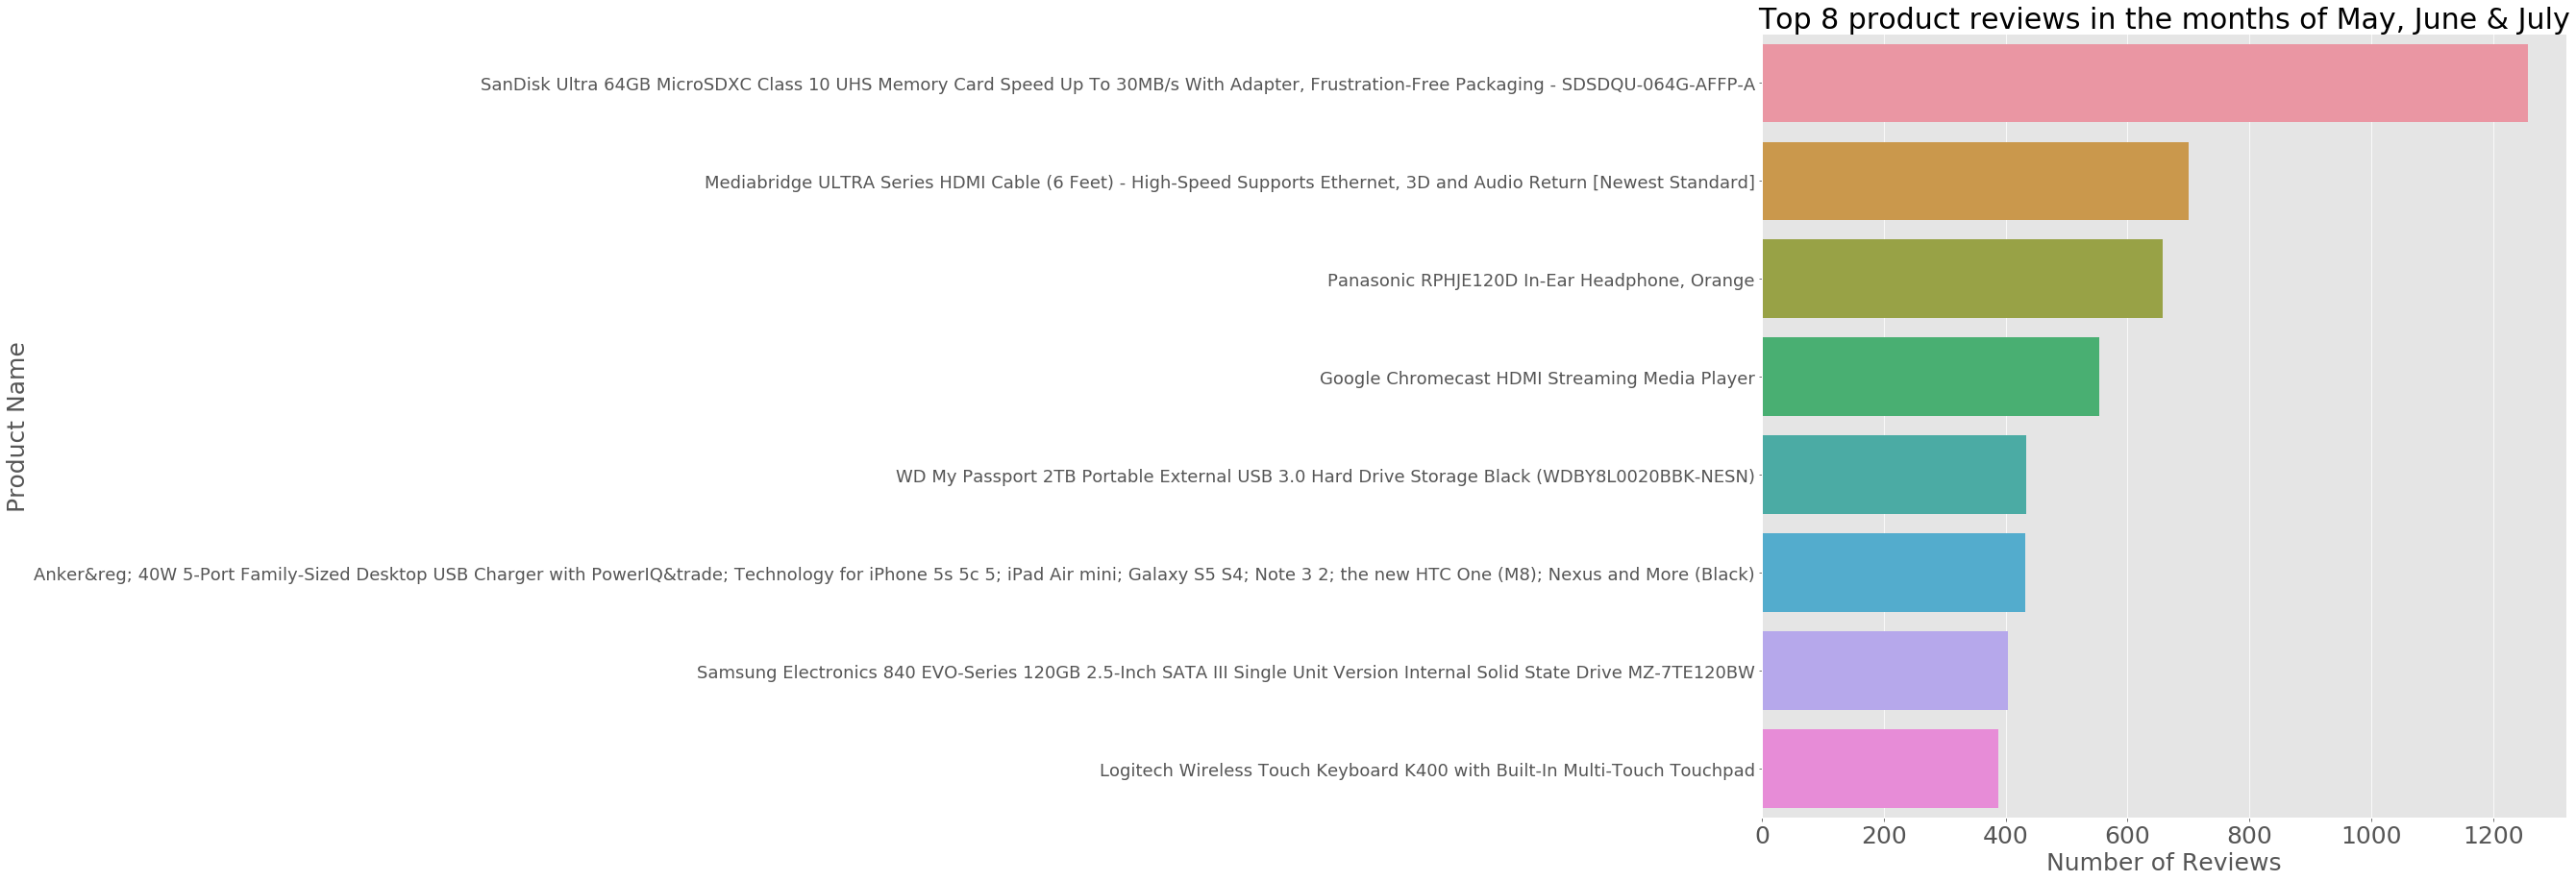

In [61]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'title', data=midyear,order=midyear.title.value_counts().head(8).index)
plt.title('Top 8 product reviews in the months of May, June & July', fontsize = 30)
plt.xlabel('Number of Reviews', fontsize= 25)
plt.ylabel('Product Name', fontsize=25)
plt.yticks(fontsize = 18)
plt.xticks(fontsize= 25)
plt.show()

In [62]:
earlyyear = reviews[reviews['Month'].isin(['2', '3', '4'])]
earlyyear.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year,day
0,A2IDCSC6NVONIZ,0972683275,"[1, 1]",This mount is just what I needed. It is stron...,5.0,Perfect,2013-04-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,4,2013,Tuesday
7,A26QCCO0101CO1,0972683275,"[7, 9]",I used this for my 47&#34; Samsung. Its fit/fe...,5.0,Just what I'd hoped,2013-02-21,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,2,2013,Thursday
8,APBF796U7GUTV,0972683275,"[1, 1]",This item serves its purpose as well as any ot...,5.0,Nice Mount,2012-03-17,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,3,2012,Saturday
9,A2HLNXOYLMERTC,0972683275,"[0, 0]",I love this mount. This is the 4th one I've b...,5.0,Buy this mount its the best,2014-04-16,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,4,2014,Wednesday
15,AUKEU9CW56TT4,0972683275,"[0, 0]",I am using this mount for a 39 inch Vizio TV a...,5.0,Easy to Mount; Rock-solid,2014-04-07,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,4,2014,Monday


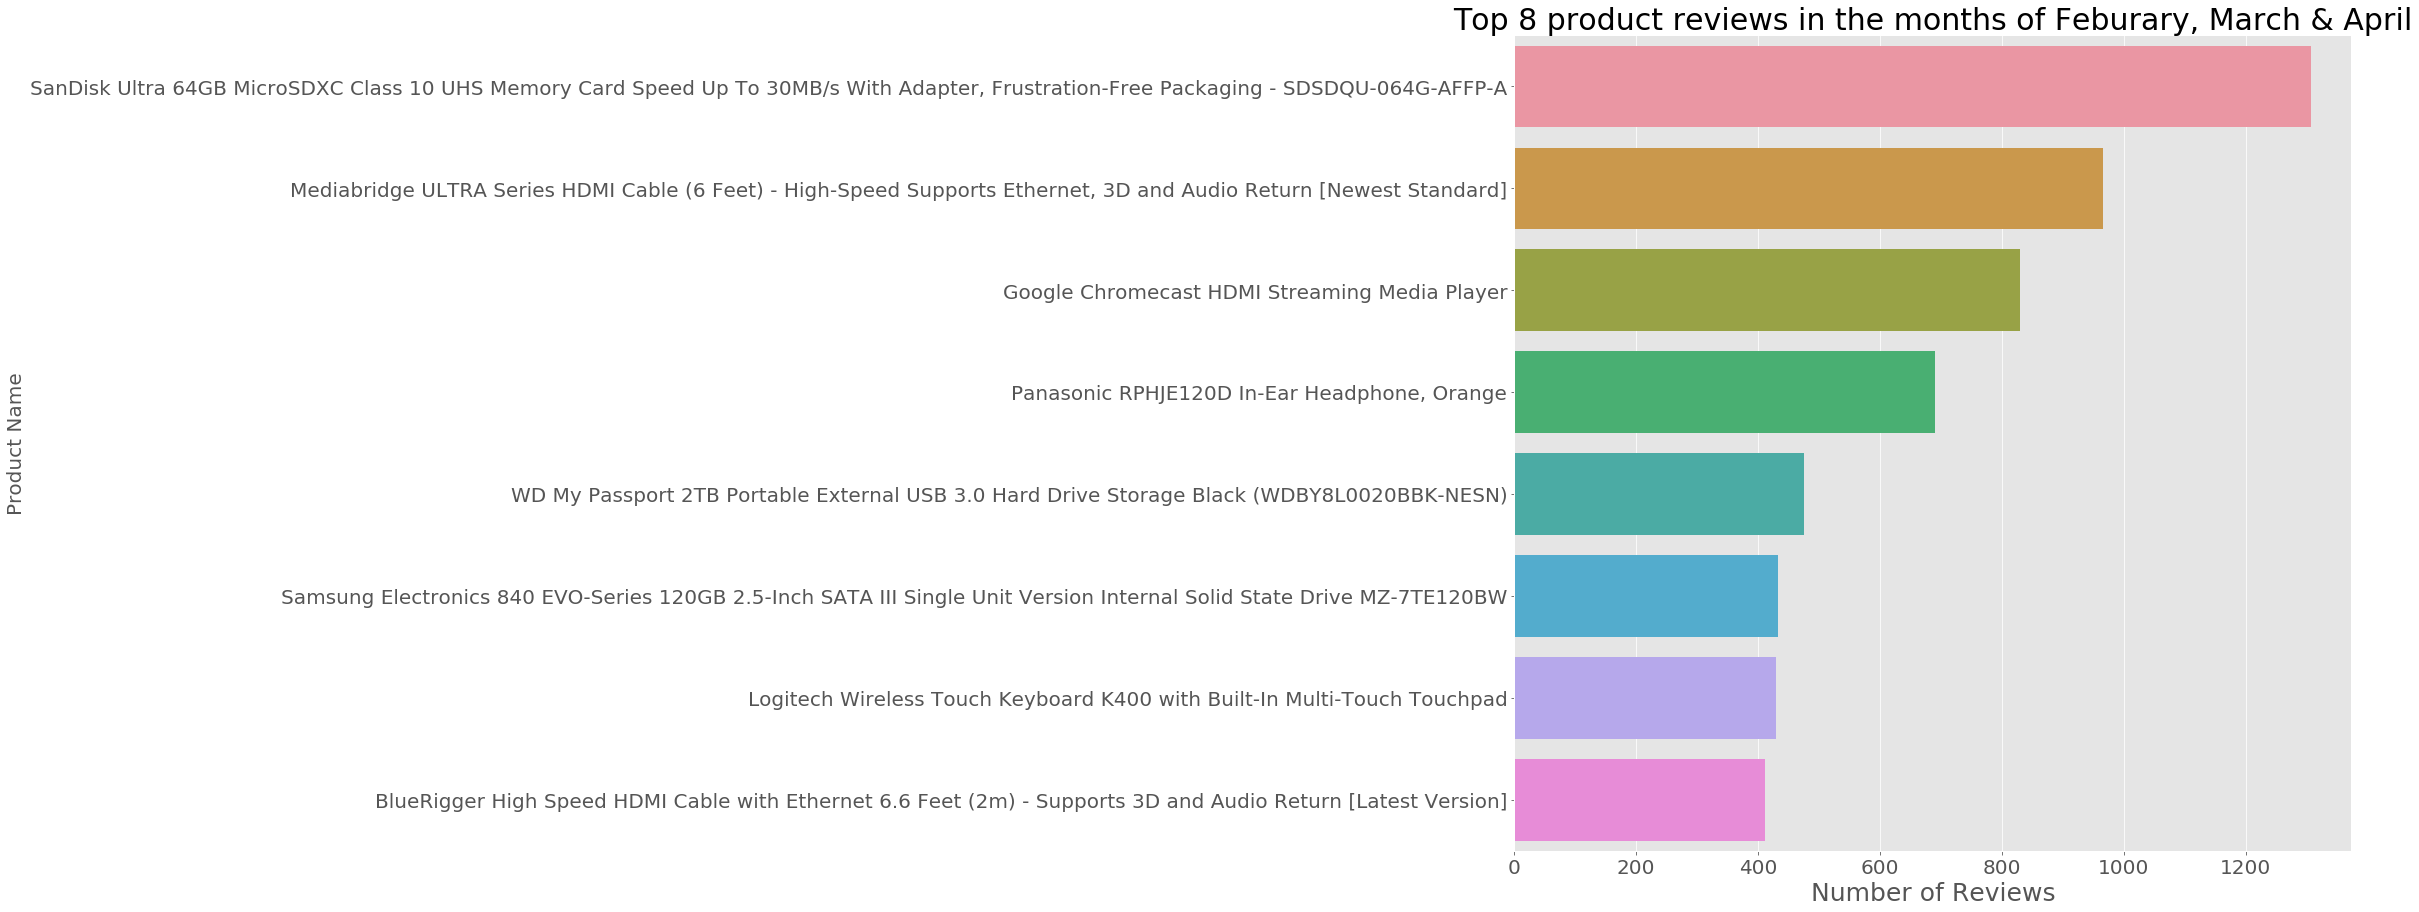

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'title', data=earlyyear,order=earlyyear.title.value_counts().head(8).index)
plt.title('Top 8 product reviews in the months of Feburary, March & April', fontsize = 30)
plt.xlabel('Number of Reviews', fontsize = 25)
plt.ylabel('Product Name', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

In [64]:
lateyear = reviews[reviews['Month'].isin(['8', '9', '10'])]
lateyear.head()

,reviewerID,asin,helpful,reviewText,overall,summary,ReviewTime,description,categories,title,price,related,brand,SentimentValue,Month,Year,day
3,AVRFGGCCCR6QU,0972683275,"[3, 4]",This wall mount does everything it's supposed ...,4.0,Fairly good wall mount,2010-08-30,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,8,2010,Monday
14,AQBLWW13U66XD,0972683275,"[0, 0]","I bought this for a 22"" TV for my son. I mount...",5.0,High Quality/Low Price,2013-08-04,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,8,2013,Sunday
25,A1MSO6LERG39PC,0972683275,"[1, 1]",Cannot beat this deal anywhere else on the web...,5.0,Outstanding Articulating Wall Mount!,2012-09-13,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,9,2012,Thursday
37,A3QH8VQDE7HZCR,0972683275,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,2010-10-05,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,10,2010,Tuesday
44,A3QPJS71FU70MX,0972683275,"[0, 0]","Nothing fancy, just decent quality and simple ...",4.0,These mounts are amazing,2013-09-27,The VideoSecu TV mount is a mounting solution ...,"[['Electronics', 'Accessories & Supplies', 'Au...",VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,29.99,"{'also_bought': ['B000X3KOD2', 'B0074FGR74', '...",VideoSecu,Positive,9,2013,Friday


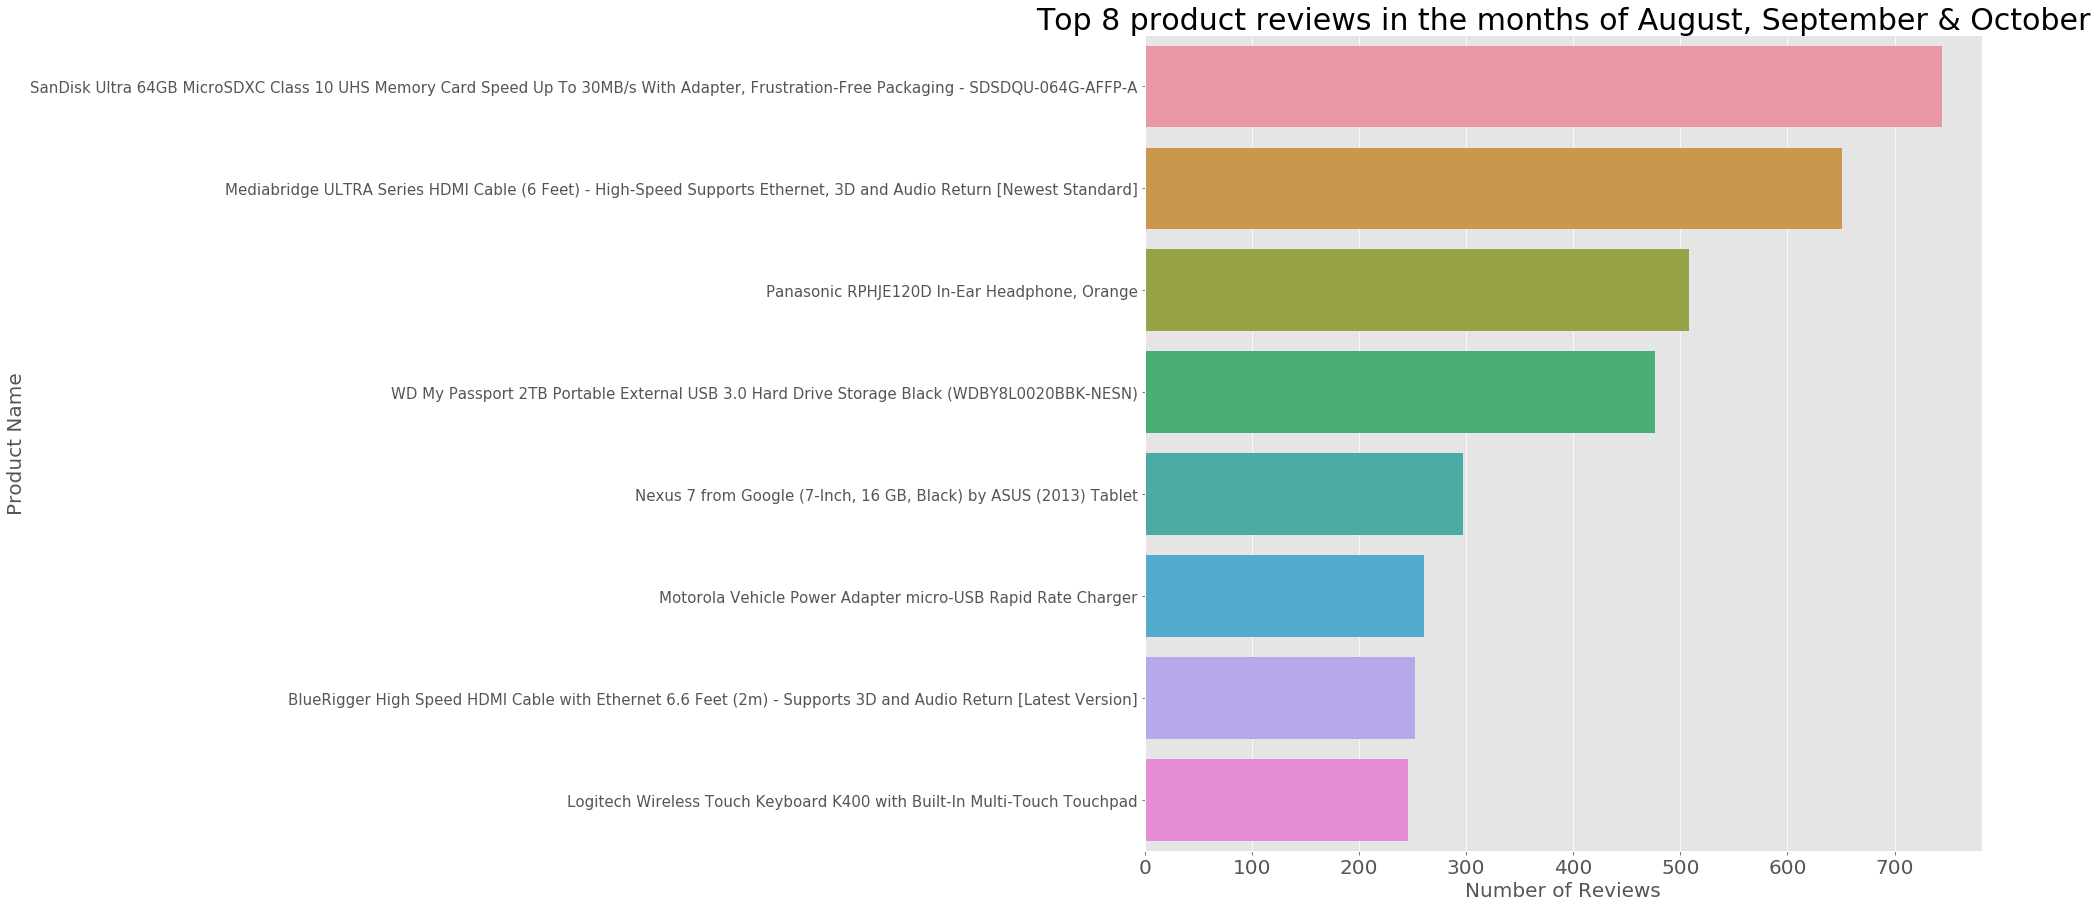

In [65]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'title', data=lateyear,order=lateyear.title.value_counts().head(8).index)
plt.title('Top 8 product reviews in the months of August, September & October', fontsize = 30)
plt.xlabel('Number of Reviews', fontsize = 20)
plt.ylabel('Product Name', fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 20)
plt.show()

In [66]:
# data retrieved from R. He, J. McAuley WWW, 2016